# Basic cleaning, transormation and feature engineering were made with data
# After some descriptive statistics were made to take a look on data
# The main disadvantage of what have been done is data was not considered as a time series that is way time series techniques was not applied
# As result plotting and analysing of distributions that do not have stationarity is wrong in terms of analysing time series


In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import scipy

In [2]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-12","2022-09-13"),
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),
]

time_periods2 = [
    ("2021-09-06","2021-09-10"), ("2021-09-13","2021-09-17"), ("2021-09-20","2021-10-01"),
    ("2021-10-04","2021-10-08"), ("2021-10-11","2021-10-15"), ("2021-11-08","2021-11-12"),
    ("2021-11-15","2021-11-19"), ("2021-11-22","2021-11-26"), ("2021-11-29","2021-12-03"),
    ("2021-12-07","2021-12-03"), ("2021-12-13","2021-12-17"), ("2021-12-20","2021-12-24"),
    ("2022-01-18","2022-01-21"), ("2022-01-24","2022-01-26"), ("2022-02-01","2022-02-04"),
    ("2022-02-08","2022-02-11"), ("2022-02-14","2022-02-18"), ("2022-02-24","2022-02-25"),
    ("2022-03-01","2022-03-04"), ("2022-03-15","2022-03-18"), ("2022-03-21","2022-03-25"),
    ("2022-03-29","2022-04-01"), ("2022-04-12","2022-04-15"), ("2022-04-18","2022-04-22"),
    ("2022-05-02","2022-05-06"), ("2022-05-09","2022-05-13"), ("2022-05-16","2022-05-20"),
    ("2022-05-23","2022-05-27"), ("2022-06-07","2022-06-10"), ("2022-06-20","2022-06-24"),
    ("2022-06-28","2022-07-01"),
    
]

time_periods3 = [
    ("2020-10-12","2020-10-16"), ("2020-10-21","2020-10-23"), ("2020-10-28","2020-10-30"),
    ("2020-11-11","2020-11-13"), ("2020-11-16","2020-11-20"), ("2020-11-24","2020-11-27"),
    ("2020-12-03","2020-12-04"), ("2020-12-07","2020-12-11"), ("2020-12-16","2020-12-18"), 
    ("2020-12-24","2020-12-25"), ("2020-12-29","2020-12-30"), ("2021-01-12","2021-01-15"),
    ("2021-01-18","2021-01-22"), ("2021-02-01","2021-02-05"), ("2021-02-08","2021-02-12"),
    ("2021-02-15","2021-02-19"), ("2021-03-01","2021-03-05"), ("2021-03-09","2021-03-12"),
    ("2021-03-15","2021-03-19"), ("2021-03-22","2021-03-26"), ("2021-04-01","2021-04-02"),
    ("2021-04-05","2021-04-09"), ("2021-04-05","2021-04-09"), ("2021-04-12","2021-04-16"),
    ("2021-04-20","2021-04-24"), ("2021-04-26","2021-04-30"), ("2021-05-03","2021-05-07"),
    ("2021-05-11","2021-05-15"), ("2021-05-17","2021-05-21"), ("2021-05-24","2021-05-28"),
    ("2021-06-15","2021-06-18"), ("2021-06-21","2021-06-25"), ("2021-06-28","2021-07-02"),
]

In [3]:
time_periods_all = [*time_periods3, *time_periods2, *time_periods]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [4]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [5]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from data_engineering import PeriodicDataPreprocess, FeatureEngineering

In [6]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("P1_second_circuit_data_050922_to_210423.csv")
df_refacP2 = CsvRefactorer.read_csv("P2_second_circuit_data_050922_to_210423.csv")

In [7]:
initial_view = df_refacP1.df.loc["2022-10-18", ][df_refacP1.df.loc["2022-10-18", "ID"] == 481]

In [8]:
df_refacP11 = CsvRefactorer.read_csv("P1_second_circuit_data_060921_to_010722.csv")
df_refacP21 = CsvRefactorer.read_csv("P2_second_circuit_data_060921_to_010722.csv")

In [9]:
df_refacP12 = CsvRefactorer.read_csv("P1_second_circuit_data_121020_to_020721.csv")
df_refacP22 = CsvRefactorer.read_csv("P2_second_circuit_data_121020_to_020721.csv")

In [483]:
ids1 = df_refacP1.df["ID"].unique()
ids2 = df_refacP2.df["ID"].unique()

ids11 = df_refacP11.df["ID"].unique()
ids21 = df_refacP21.df["ID"].unique()

ids12 = df_refacP12.df["ID"].unique()
ids22 = df_refacP22.df["ID"].unique()

In [484]:
ids1_array = df_refacP1.select_by_ids(ids1)
ids2_array = df_refacP2.select_by_ids(ids2)

ids11_array = df_refacP11.select_by_ids(ids11)
ids21_array = df_refacP21.select_by_ids(ids21)

ids12_array = df_refacP12.select_by_ids(ids12)
ids22_array = df_refacP22.select_by_ids(ids22)

In [485]:
group1 = df_refacP1.min_frac_groupby(5, *ids1_array)
group2 = df_refacP2.min_frac_groupby(5, *ids2_array)

group11 = df_refacP11.min_frac_groupby(5, *ids11_array)
group21 = df_refacP21.min_frac_groupby(5, *ids21_array)

group12 = df_refacP12.min_frac_groupby(5, *ids12_array)
group22 = df_refacP22.min_frac_groupby(5, *ids22_array)

In [486]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

df11 = df_refacP11.concat_dfs(group11)
df21 = df_refacP21.concat_dfs(group21)

df12 = df_refacP12.concat_dfs(group12)
df22 = df_refacP22.concat_dfs(group22)

In [487]:
df = pd.concat([df1, df2], axis=1)
df11 = pd.concat([df11, df21], axis=1)
df12 = pd.concat([df12, df22], axis=1)

In [488]:
df = pd.concat([df12, df11, df], axis=0)

In [489]:
df

299   309        315        317        319  \
Timestamp                                                               
2020-10-12 13:30:00  16.400000   NaN  15.900000  13.700000  18.716667   
2020-10-12 13:35:00  16.400000   NaN  15.900000  13.700000  18.742105   
2020-10-12 13:40:00  16.400000   NaN  15.900000  13.700000  18.700001   
2020-10-12 13:45:00  16.400000   NaN  15.900000  13.700000  18.700001   
2020-10-12 13:50:00  16.400000   NaN  15.900000  13.700000  18.706251   
...                        ...   ...        ...        ...        ...   
2023-04-14 10:25:00  40.099998  0.48  46.400002  22.768750  28.687501   
2023-04-14 10:30:00  40.099998  0.48  46.400002  22.693751  28.600000   
2023-04-14 10:35:00  40.052940  0.48  46.400002  22.700001  28.600000   
2023-04-14 10:40:00  40.000000  0.48  46.400002  22.700001  28.600000   
2023-04-14 10:45:00  40.056249  0.48  46.400002  22.769230  28.633334   

                           321       325       327       381        395  \
Timestamp                                                                 
2020-10-12 13:30:00  18.200001  15.70000  4.800000       NaN        NaN   
2020-10-12 13:35:00  18.144445  15.70000  4.800000  1.582728        NaN   
2020-10-12 13:40:00  18.047059  15.70000  4.850000  3.565465        NaN   
2020-10-12 13:45:00  17.964706  15.70000  4.887500  3.565465   4.483624   
2020-10-12 13:50:00  17.906250  15.70000  4.900000  0.036052        NaN   
...                        ...       ...       ...       ...        ...   
2023-04-14 10:25:00  41.368422  28.58750 -5.088889  1.891432  78.309657   
2023-04-14 10:30:00  41.305556  28.50625 -5.026316       NaN  78.254219   
2023-04-14 10:35:00  41.289473  28.50625 -5.045000       NaN  78.218852   
2023-04-14 10:40:00  41.336842  28.51250 -4.473684  1.254645  78.296664   
2023-04-14 10:45:00  41.268750  28.60000 -4.381250       NaN  78.331325   

                          396       481         406         407         408  \
Timestamp                                                                     
2020-10-12 13:30:00       NaN    1.0000         NaN         NaN         NaN   
2020-10-12 13:35:00  4.349432    1.0000    0.013053    2.917608         NaN   
2020-10-12 13:40:00       NaN    1.0000    1.509460    2.451208         NaN   
2020-10-12 13:45:00       NaN    1.0000         NaN    3.857790         NaN   
2020-10-12 13:50:00  3.554422    1.0000    0.093234    1.993246         NaN   
...                       ...       ...         ...         ...         ...   
2023-04-14 10:25:00  2.442839  653.0000  143.968864  138.526026  139.964314   
2023-04-14 10:30:00       NaN  653.2000  143.963260  138.575391  140.052242   
2023-04-14 10:35:00       NaN  652.6500  143.815974  138.413076  139.756535   
2023-04-14 10:40:00       NaN  652.2500  143.835338  138.403642  139.858453   
2023-04-14 10:45:00       NaN  652.6875  143.690959  138.224965  140.031096   

                          409        460        461        462        463  
Timestamp                                                                  
2020-10-12 13:30:00       NaN        NaN  16.134724        NaN  15.742442  
2020-10-12 13:35:00  3.635493        NaN  16.134511  16.170436  15.740764  
2020-10-12 13:40:00       NaN  15.955994        NaN  16.169542  15.739886  
2020-10-12 13:45:00       NaN  15.955373        NaN  16.166189  15.736478  
2020-10-12 13:50:00  0.696367  15.954758  16.138088  16.166189  15.736292  
...                       ...        ...        ...        ...        ...  
2023-04-14 10:25:00  0.033068  28.452180  30.183123  28.453894        NaN  
2023-04-14 10:30:00  1.297358  28.392393  30.130874  28.394041  32.806785  
2023-04-14 10:35:00       NaN  28.404202  30.135719  28.402986  32.805665  
2023-04-14 10:40:00       NaN  28.388642  30.120315  28.392275        NaN  
2023-04-14 10:45:00       NaN  28.426711  30.153793  28.429331  32.802895  

[243288 rows x 20 columns]

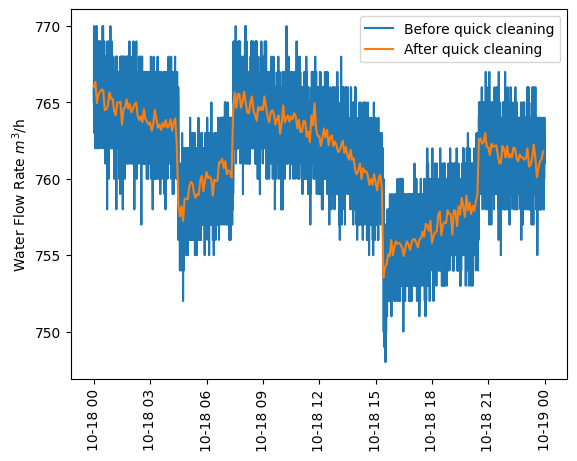

In [490]:

plt.plot(initial_view["Value"], label="Before quick cleaning")
plt.plot(df.loc["2022-10-18", 481], label="After quick cleaning")
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

In [491]:
df = df.rename(columns=df_refacP1.IDS_MAP)
# df11 = df11.rename(columns=df_refacP11.IDS_MAP)
# df12 = df12.rename(columns=df_refacP11.IDS_MAP)

In [492]:
df.loc["2020-10-22"]

T1aHE   P2      T1bHE      T2bHE      T2aHE  \
Timestamp                                                              
2020-10-22 00:00:00  39.968750  0.4  45.700000  25.849999  31.752941   
2020-10-22 00:05:00  40.068749  0.4  45.799999  25.950000  31.849999   
2020-10-22 00:10:00  40.168750  0.4  45.868751  26.068750  31.968750   
2020-10-22 00:15:00  40.250000  0.4  45.950001  26.168751  32.068749   
2020-10-22 00:20:00  40.350000  0.4  46.031250  26.287499  32.168750   
...                        ...  ...        ...        ...        ...   
2020-10-22 23:35:00  38.382354  0.4  44.650000  22.436842  29.000000   
2020-10-22 23:40:00  38.299999  0.4  44.599998  22.422222  29.000000   
2020-10-22 23:45:00  38.287499  0.4  44.576469  22.323529  28.912500   
2020-10-22 23:50:00  38.222223  0.4  44.549999  22.322222  28.900000   
2020-10-22 23:55:00  38.200001  0.4  44.487500  22.323529  28.876470   

                      Treactor     T2aHE1       Tair      CTF1       CTF2  \
Timestamp                                                                   
2020-10-22 00:00:00  43.260000  32.268750  11.683333       NaN  74.834709   
2020-10-22 00:05:00  43.320000  32.350000  11.468750       NaN  74.704123   
2020-10-22 00:10:00  43.325001  32.468750  11.336842       NaN  74.600935   
2020-10-22 00:15:00  43.447369  32.568749  11.200000  1.498003  74.544744   
2020-10-22 00:20:00  43.510526  32.668750  11.072222       NaN  74.674723   
...                        ...        ...        ...       ...        ...   
2020-10-22 23:35:00  42.534999  29.687501   5.000000       NaN  74.967650   
2020-10-22 23:40:00  42.494737  29.623530   5.000000       NaN  74.868448   
2020-10-22 23:45:00  42.489474  29.587500   5.000000       NaN  74.871687   
2020-10-22 23:50:00  42.435001  29.566667   4.912500       NaN  74.867939   
2020-10-22 23:55:00  42.395000  29.500000   4.893750       NaN  74.882162   

                          CTF3      Q2       p21         p22        p23  \
Timestamp                                                                 
2020-10-22 00:00:00   0.081483  661.60       NaN  145.950532  87.808146   
2020-10-22 00:05:00        NaN  662.80       NaN  145.798701  87.935183   
2020-10-22 00:10:00        NaN  660.85  3.703270  145.672644  87.972934   
2020-10-22 00:15:00        NaN  660.65       NaN  145.469037  88.067533   
2020-10-22 00:20:00   1.199064  662.00       NaN  145.482904  87.803111   
...                        ...     ...       ...         ...        ...   
2020-10-22 23:35:00  92.765560  655.30       NaN  146.083955  87.983347   
2020-10-22 23:40:00  92.767026  655.40  2.647857  145.964399  87.927159   
2020-10-22 23:45:00  92.716835  655.45       NaN  145.900218  88.049525   
2020-10-22 23:50:00  92.938390  656.10       NaN  146.194027  87.797041   
2020-10-22 23:55:00  92.839140  654.60       NaN  145.997459  87.694281   

                           p24     T2aHE2     T2aHE3     T2aHE4     T2aHE5  
Timestamp                                                                   
2020-10-22 00:00:00  97.952647  31.991565  32.620366  30.826537  31.062896  
2020-10-22 00:05:00  98.110906  32.086823  32.721663  30.922913  31.160168  
2020-10-22 00:10:00  98.274015  32.201984  32.837718  31.043218  31.280249  
2020-10-22 00:15:00  98.433785  32.303506  32.944158  31.144738  31.381323  
2020-10-22 00:20:00  98.083501  32.403791  33.045679  31.246648  31.484620  
...                        ...        ...        ...        ...        ...  
2020-10-22 23:35:00  97.412027  29.343529  29.973972  27.979486  28.246257  
2020-10-22 23:40:00  97.462529  29.312975  29.939434  27.949072  28.216069  
2020-10-22 23:45:00  97.500945  29.241185  29.871070  27.870585  28.134002  
2020-10-22 23:50:00  97.318678  29.229935  29.852227  27.862983  28.134226  
2020-10-22 23:55:00  97.243647  29.198109  29.821764  27.834807  28.105555  

[288 rows x 20 columns]

In [493]:
df = df.reindex(sorted(df.columns), axis=1)
# df11 = df11.reindex(sorted(df11.columns), axis=1)
# df12 = df12.reindex(sorted(df12.columns), axis=1)

In [494]:
# # quick TCF categorizing ( set 0 or 1)

# df["CTF1"] = np.where(df["CTF1"] > 20, 1, 0)
# df["CTF2"] = np.where(df["CTF2"] > 20, 1, 0)
# df["CTF3"] = np.where(df["CTF3"] > 20, 1, 0)

# # quick I of pumps filter
# df["p21"] = np.where(df["p21"] < 10, 1, df["p21"])
# df["p22"] = np.where(df["p22"] < 10, 1, df["p22"])
# df["p23"] = np.where(df["p23"] < 10, 1, df["p23"])
# df["p24"] = np.where(df["p24"] < 10, 1, df["p24"])

In [495]:
# # quick TCF categorizing ( set 0 or 1)

# df11["CTF1"] = np.where(df11["CTF1"] > 20, 1, 0)
# df11["CTF2"] = np.where(df11["CTF2"] > 20, 1, 0)
# df11["CTF3"] = np.where(df11["CTF3"] > 20, 1, 0)

# # quick I of pumps filter
# df11["p21"] = np.where(df11["p21"] < 10, 1, df11["p21"])
# df11["p22"] = np.where(df11["p22"] < 10, 1, df11["p22"])
# df11["p23"] = np.where(df11["p23"] < 10, 1, df11["p23"])
# df11["p24"] = np.where(df11["p24"] < 10, 1, df11["p24"])

In [496]:
# # quick TCF categorizing ( set 0 or 1)

# df12["CTF1"] = np.where(df12["CTF1"] > 20, 1, 0)
# df12["CTF2"] = np.where(df12["CTF2"] > 20, 1, 0)
# df12["CTF3"] = np.where(df12["CTF3"] > 20, 1, 0)

# # quick I of pumps filter
# df12["p21"] = np.where(df12["p21"] < 10, 1, df12["p21"])
# df12["p22"] = np.where(df12["p22"] < 10, 1, df12["p22"])
# df12["p23"] = np.where(df12["p23"] < 10, 1, df12["p23"])
# df12["p24"] = np.where(df12["p24"] < 10, 1, df12["p24"])

In [497]:
periods_all = df_refacP1.select_time_period(df, time_periods_all)
periods_all

{'2020-10-12 2020-10-16':                          CTF1      CTF2      CTF3        P2          Q2  \
 Timestamp                                                                 
 2020-10-12 13:30:00  0.000000  0.000000  0.000000  0.000000    1.000000   
 2020-10-12 13:35:00  1.582728  0.000000  4.349432  0.000000    1.000000   
 2020-10-12 13:40:00  3.565465  0.000000  0.000000  0.000000    1.000000   
 2020-10-12 13:45:00  3.565465  4.483624  0.000000  0.000000    1.000000   
 2020-10-12 13:50:00  0.036052  0.000000  3.554422  0.000000    1.000000   
 ...                       ...       ...       ...       ...         ...   
 2020-10-16 23:35:00  0.000000  3.424679  0.000000  0.346250  695.350000   
 2020-10-16 23:40:00  0.000000  3.978002  1.686834  0.125556  155.352941   
 2020-10-16 23:45:00  0.000000  0.000000  0.000000  0.000000    0.000000   
 2020-10-16 23:50:00  0.000000  0.000000  0.000000  0.000000    0.000000   
 2020-10-16 23:55:00  0.000000  0.000000  0.000000  0.000000   

In [498]:
pdp = PeriodicDataPreprocess(periods_all.copy())
# pdp11 = PeriodicDataPreprocess(periods2)
# pdp12 = PeriodicDataPreprocess(periods3)

In [499]:
pdp.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)
# pdp11.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)
# pdp12.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-12 13:35:00   1.582728   0.000000  4.349432  0.000000    1.000000   
 2020-10-12 13:40:00   3.565465   0.000000  0.000000  0.000000    1.000000   
 2020-10-12 13:45:00   3.565465   4.483624  0.000000  0.000000    1.000000   
 2020-10-12 13:50:00   0.036052   0.000000  3.554422  0.000000    1.000000   
 2020-10-12 13:55:00   2.938313   2.046171  0.000000  0.000000    1.000000   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 23:20:00  94.021945  76.286322  3.616085  0.400000  644.250000   
 2020-10-16 23:25:00  93.736988  76.247705  3.514770  0.400000  644.950000   
 2020-10-16 23:30:00  80.447662  66.058528  3.430923  0.381176  699.200000   
 2020-10-16 23:35:00   0.000000   3.424679  0.000000  0.346250  695.350000   
 2020-10-16 23:40:00   0.000000   3.978

In [500]:
pdp.filter_by_zscore(column="Q2")
pdp.filter_by_zscore(column="dt1")
pdp.filter_by_zscore(column="dt2")

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3   P2      Q2      T1aHE  \
 Timestamp                                                                     
 2020-10-13 00:15:00   0.000000  79.818654  0.933748  0.4  648.45  40.694444   
 2020-10-13 00:20:00   0.000000  79.548483  3.598467  0.4  647.10  41.066667   
 2020-10-13 12:30:00   0.000000  75.804270  0.000000  0.4  648.80  37.912501   
 2020-10-13 12:35:00   0.000000  75.797024  2.638247  0.4  647.70  38.031250   
 2020-10-13 12:40:00   2.869821  75.632053  0.000000  0.4  649.20  38.182353   
 ...                        ...        ...       ...  ...     ...        ...   
 2020-10-16 21:55:00   0.000000  76.060994  0.000000  0.4  647.70  41.049999   
 2020-10-16 22:00:00   0.000000  75.901968  3.867141  0.4  647.75  41.000000   
 2020-10-16 22:05:00  97.707616  75.976042  1.861904  0.4  646.60  41.000000   
 2020-10-16 22:10:00  95.019643  76.025805  0.002202  0.4  648.00  41.000000   
 2020-10-16 22:

In [501]:
# pdp.sma_smoothing(num_points=10)

In [502]:
pdp.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)
# pdp11.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)
# pdp12.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)

['p21', 'p22', 'p23', 'p24']


{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3   P2      Q2      T1aHE  \
 Timestamp                                                                     
 2020-10-13 00:15:00   0.000000  79.818654  0.933748  0.4  648.45  40.694444   
 2020-10-13 00:20:00   0.000000  79.548483  3.598467  0.4  647.10  41.066667   
 2020-10-13 12:30:00   0.000000  75.804270  0.000000  0.4  648.80  37.912501   
 2020-10-13 12:35:00   0.000000  75.797024  2.638247  0.4  647.70  38.031250   
 2020-10-13 12:40:00   2.869821  75.632053  0.000000  0.4  649.20  38.182353   
 ...                        ...        ...       ...  ...     ...        ...   
 2020-10-16 21:55:00   0.000000  76.060994  0.000000  0.4  647.70  41.049999   
 2020-10-16 22:00:00   0.000000  75.901968  3.867141  0.4  647.75  41.000000   
 2020-10-16 22:05:00  97.707616  75.976042  1.861904  0.4  646.60  41.000000   
 2020-10-16 22:10:00  95.019643  76.025805  0.002202  0.4  648.00  41.000000   
 2020-10-16 22:

(640.0, 740.0)

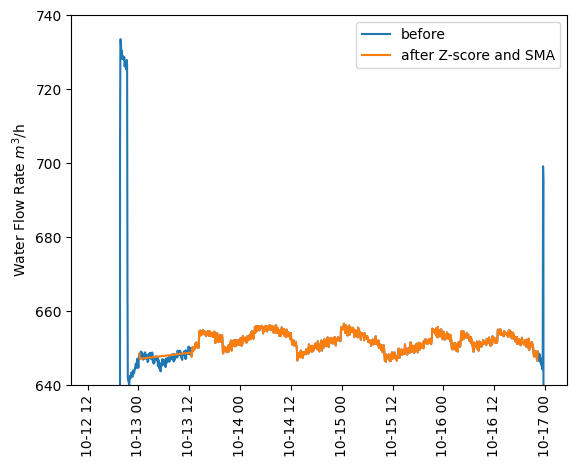

In [503]:
# quick view on sma results
plt.plot(periods_all["2020-10-12 2020-10-16"].loc[:, "Q2"], label="before")
plt.plot(pdp.period["2020-10-12 2020-10-16"].loc[:, "Q2"], label="after Z-score and SMA")
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(640, 740)

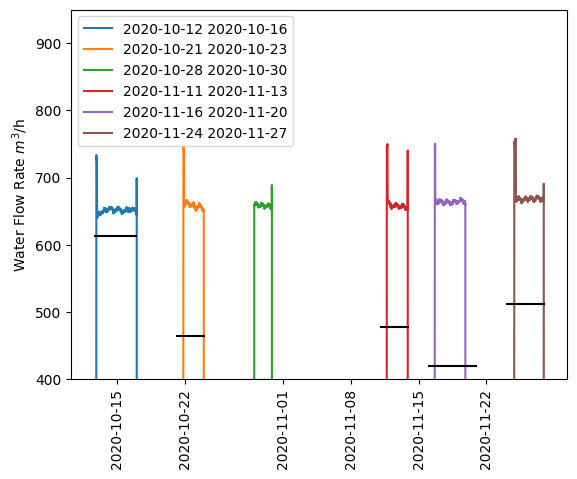

In [504]:
# plot Q2 for some weeks before zscore filtering
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
        
)
plt.ylim(400, 950)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

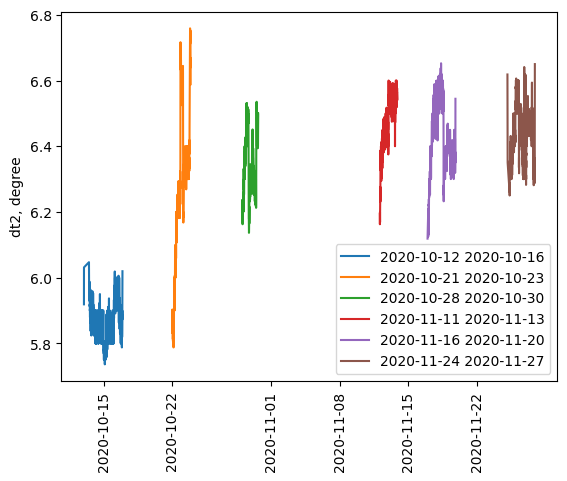

In [505]:
## dt2 has high bias so lets check how Q2 filtering fixed it
# plot dt for some weeks
# is there an urge to filter data one more time but now by dt?
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(
        pdp.period[i]["dt2"], 
        label=i)

plt.ylabel("dt2, degree")
plt.xticks(rotation=90)
plt.legend()

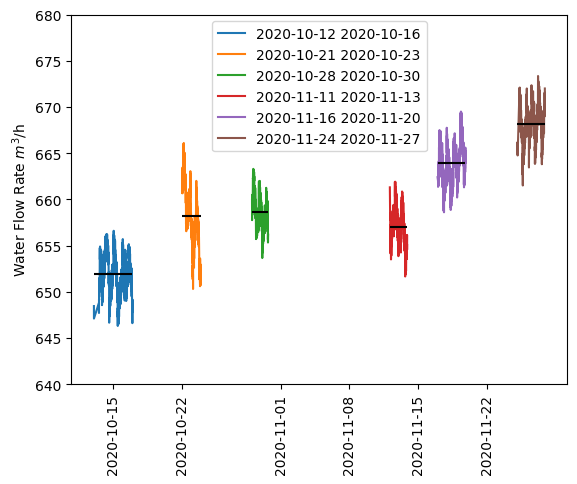

In [506]:
# plot Q2 for some weeks
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(pdp.period[i]["Q2"], label=i)
    plt.hlines(
        pdp.period[i]["Q2"].mean(),
        pdp.period[i]["Q2"].index[0],
        pdp.period[i]["Q2"].index[-1],
        color="black"
        
)
plt.ylim(640,680)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

In [507]:
pa_ftrd = pdp.period["2020-10-12 2020-10-16"].copy()

In [508]:
# quick binning to plot data distribution bar
periods_all["2020-10-12 2020-10-16"]["Q2_binned"], pa_bins = pd.cut(
    periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
    bins=100,
    labels=False,
    retbins=True
)
pa_bins = np.array(
    list(
        map(
            lambda x: "{:.1f}".format(x),
            pa_bins
        )
    )
)


pa_ftrd["Q2_binned"], pa_ftrd_bins = pd.cut(
    pa_ftrd["Q2"],
    bins=19,
    labels=False,
    retbins=True
)

In [509]:
pa_q2_gr = periods_all["2020-10-12 2020-10-16"].groupby("Q2_binned").count()
pa_q2_gr_ftrd = pa_ftrd.groupby("Q2_binned").count()

In [510]:
pa_q2_gr = pa_q2_gr[pa_q2_gr > 1].dropna()
pa_q2_gr

CTF1   CTF2   CTF3     P2     Q2  T1aHE  T1bHE  T2aHE  T2aHE1  \
Q2_binned                                                                   
0.0          2.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0     2.0   
1.0          3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0     3.0   
2.0          7.0    7.0    7.0    7.0    7.0    7.0    7.0    7.0     7.0   
3.0          6.0    6.0    6.0    6.0    6.0    6.0    6.0    6.0     6.0   
4.0          8.0    8.0    8.0    8.0    8.0    8.0    8.0    8.0     8.0   
5.0         17.0   17.0   17.0   17.0   17.0   17.0   17.0   17.0    17.0   
6.0         22.0   22.0   22.0   22.0   22.0   22.0   22.0   22.0    22.0   
7.0         71.0   71.0   71.0   71.0   71.0   71.0   71.0   71.0    71.0   
8.0         89.0   89.0   89.0   89.0   89.0   89.0   89.0   89.0    89.0   
9.0         91.0   91.0   91.0   91.0   91.0   91.0   91.0   91.0    91.0   
10.0        84.0   84.0   84.0   84.0   84.0   84.0   84.0   84.0    84.0   
11.0       144.0  144.0  144.0  144.0  144.0  144.0  144.0  144.0   144.0   
12.0       162.0  162.0  162.0  162.0  162.0  162.0  162.0  162.0   162.0   
13.0       146.0  146.0  146.0  146.0  146.0  146.0  146.0  146.0   146.0   
14.0       117.0  117.0  117.0  117.0  117.0  117.0  117.0  117.0   117.0   
15.0       119.0  119.0  119.0  119.0  119.0  119.0  119.0  119.0   119.0   
16.0        74.0   74.0   74.0   74.0   74.0   74.0   74.0   74.0    74.0   
17.0        14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0    14.0   
92.0         3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0     3.0   
93.0         3.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0     3.0   
94.0         7.0    7.0    7.0    7.0    7.0    7.0    7.0    7.0     7.0   
96.0         2.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0     2.0   
99.0         2.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0     2.0   

           T2aHE2  T2aHE3  T2aHE4  T2aHE5  T2bHE   Tair  Treactor    p21  \
Q2_binned                                                                  
0.0           2.0     2.0     2.0     2.0    2.0    2.0       2.0    2.0   
1.0           3.0     3.0     3.0     3.0    3.0    3.0       3.0    3.0   
2.0           7.0     7.0     7.0     7.0    7.0    7.0       7.0    7.0   
3.0           6.0     6.0     6.0     6.0    6.0    6.0       6.0    6.0   
4.0           8.0     8.0     8.0     8.0    8.0    8.0       8.0    8.0   
5.0          17.0    17.0    17.0    17.0   17.0   17.0      17.0   17.0   
6.0          22.0    22.0    22.0    22.0   22.0   22.0      22.0   22.0   
7.0          71.0    71.0    71.0    71.0   71.0   71.0      71.0   71.0   
8.0          89.0    89.0    89.0    89.0   89.0   89.0      89.0   89.0   
9.0          91.0    91.0    91.0    91.0   91.0   91.0      91.0   91.0   
10.0         84.0    84.0    84.0    84.0   84.0   84.0      84.0   84.0   
11.0        144.0   144.0   144.0   144.0  144.0  144.0     144.0  144.0   
12.0        162.0   162.0   162.0   162.0  162.0  162.0     162.0  162.0   
13.0        146.0   146.0   146.0   146.0  146.0  146.0     146.0  146.0   
14.0        117.0   117.0   117.0   117.0  117.0  117.0     117.0  117.0   
15.0        119.0   119.0   119.0   119.0  119.0  119.0     119.0  119.0   
16.0         74.0    74.0    74.0    74.0   74.0   74.0      74.0   74.0   
17.0         14.0    14.0    14.0    14.0   14.0   14.0      14.0   14.0   
92.0          3.0     3.0     3.0     3.0    3.0    3.0       3.0    3.0   
93.0          3.0     3.0     3.0     3.0    3.0    3.0       3.0    3.0   
94.0          7.0     7.0     7.0     7.0    7.0    7.0       7.0    7.0   
96.0          2.0     2.0     2.0     2.0    2.0    2.0       2.0    2.0   
99.0          2.0     2.0     2.0     2.0    2.0    2.0       2.0    2.0   

             p22    p23    p24  
Q2_binned                       
0.0          2.0    2.0    2.0  
1.0          3.0    3.0    3.0  
2.0          7.0    7.0    7.0  
3.0          6.0    

23


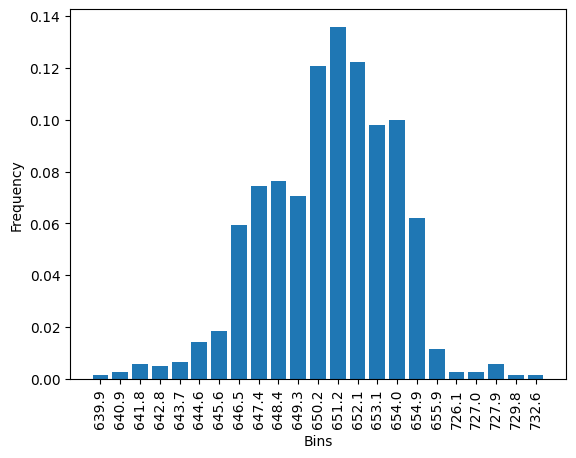

In [511]:
pa_q2_gr_ni = pa_q2_gr.reset_index()
plt.bar(pa_q2_gr_ni.index, pa_q2_gr_ni["Q2"]/pa_q2_gr_ni["Q2"].sum())
plt.ylabel("Frequency")
plt.xlabel("Bins")
plt.xticks(
    pa_q2_gr_ni.index,
#     pa_bins[pa_q2_gr.index.astype(int)],
    pa_bins[pa_q2_gr_ni["Q2_binned"].astype(int)],
    rotation=90
)
print(len(pa_bins[pa_q2_gr_ni["Q2_binned"].astype(int)]))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6f1d3ee6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6f1d3ece80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6f1d3ef970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6f1d3ec370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f1d3eecb0>],
 'means': []}

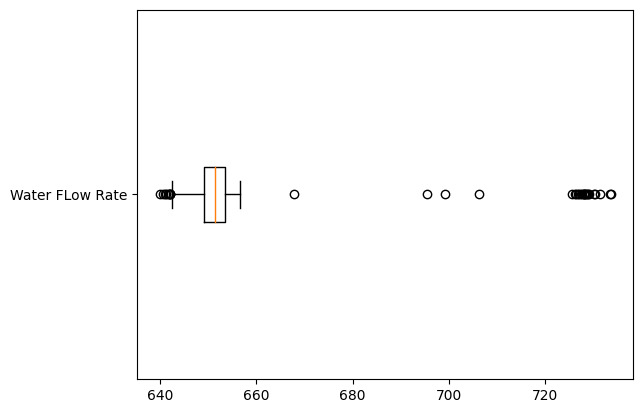

In [512]:
# before filtering
plt.boxplot(
    periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
    vert=False,
    labels=["Water FLow Rate"]
)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6f10275c30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6f10276d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6f102759c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6f10277b20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f102753c0>,
 'means': []}

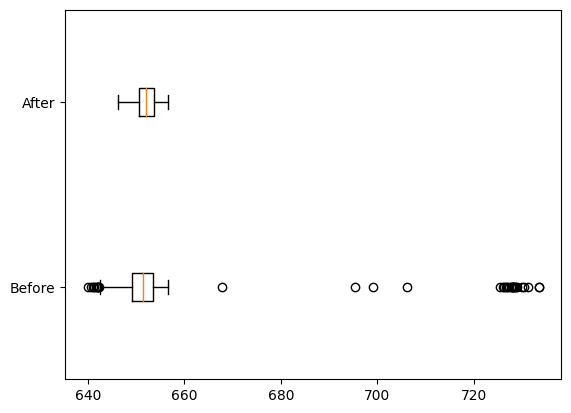

In [513]:
plt.boxplot(
    [
        periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
        pa_ftrd["Q2"]
    ], 
    vert=False,
    labels=[
        "Before",
        "After"
    ]
)

In [514]:
df = pdp.to_dataframe()
# df11 = pdp11.to_dataframe()
# df12 = pdp12.to_dataframe()
df

CTF1       CTF2      CTF3    P2        Q2      T1aHE  \
Timestamp                                                                       
2020-10-13 00:15:00  0.000000  79.818654  0.933748  0.40  648.4500  40.694444   
2020-10-13 00:20:00  0.000000  79.548483  3.598467  0.40  647.1000  41.066667   
2020-10-13 12:30:00  0.000000  75.804270  0.000000  0.40  648.8000  37.912501   
2020-10-13 12:35:00  0.000000  75.797024  2.638247  0.40  647.7000  38.031250   
2020-10-13 12:40:00  2.869821  75.632053  0.000000  0.40  649.2000  38.182353   
...                       ...        ...       ...   ...       ...        ...   
2023-04-14 10:25:00  1.891432  78.309657  2.442839  0.48  653.0000  40.099998   
2023-04-14 10:30:00  0.000000  78.254219  0.000000  0.48  653.2000  40.099998   
2023-04-14 10:35:00  0.000000  78.218852  0.000000  0.48  652.6500  40.052940   
2023-04-14 10:40:00  1.254645  78.296664  0.000000  0.48  652.2500  40.000000   
2023-04-14 10:45:00  0.000000  78.331325  0.000000  0.48  652.6875  40.056249   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-13 00:15:00  46.461111  32.531250  33.082352  32.779357  ...   
2020-10-13 00:20:00  46.931579  32.631249  33.231250  32.909723  ...   
2020-10-13 12:30:00  43.799999  29.300000  29.964706  29.623940  ...   
2020-10-13 12:35:00  43.868751  29.550000  30.168750  29.841741  ...   
2020-10-13 12:40:00  44.000000  29.782353  30.400000  30.064014  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 10:25:00  46.400002  28.687501  28.587500  28.452180  ...   
2023-04-14 10:30:00  46.400002  28.600000  28.506250  28.392393  ...   
2023-04-14 10:35:00  46.400002  28.600000  28.506250  28.404202  ...   
2023-04-14 10:40:00  46.400002  28.600000  28.512500  28.388642  ...   
2023-04-14 10:45:00  46.400002  28.633334  28.600000  28.426711  ...   

                         T2bHE      Tair   Treactor         p21         p22  \
Timestamp                                                                     
2020-10-13 00:15:00  26.612500  5.700000  44.835000    0.000000  146.281610   
2020-10-13 00:20:00  26.600000  5.712500  45.290001    0.000000  146.316031   
2020-10-13 12:30:00  23.252941  6.893750  43.610525    0.000000  146.168781   
2020-10-13 12:35:00  23.533333  6.900000  43.375000    1.831037  146.381139   
2020-10-13 12:40:00  23.800000  6.950000  43.636841    1.618534  146.305592   
...                        ...       ...        ...         ...         ...   
2023-04-14 10:25:00  22.768750 -5.088889  41.368422  143.968864  138.526026   
2023-04-14 10:30:00  22.693751 -5.026316  41.305556  143.963260  138.575391   
2023-04-14 10:35:00  22.700001 -5.045000  41.289473  143.815974  138.413076   
2023-04-14 10:40:00  22.700001 -4.473684  41.336842  143.835338  138.403642   
2023-04-14 10:45:00  22.769230 -4.381250  41.268750  143.690959  138.224965   

                            p23        p24       dt1       dt2  pumps2  
Timestamp                                                               
2020-10-13 00:15:00   87.380033  94.586956  5.766667  5.918749     234  
2020-10-13 00:20:00   87.607784  94.838087  5.864912  6.031249     234  
2020-10-13 12:30:00   87.394382  94.380165  5.887498  6.047059     234  
2020-10-13 12:35:00   87.351539  94.362987  5.837501  6.016667     234  
2020-10-13 12:40:00   87.582651  94.681785  5.817647  5.982353     234  
...                         ...        ...       ...       ...     ...  
2023-04-14 10:25:00  139.964314   0.033068  6.300003  5.918751     123  
2023-04-14 10:30:00  140.052242   1.297358  6.300003  5.906250     123  
2023-04-14 10:35:00  139.756535   0.000000  6.347061  5.900000     123  
2023-04-14 10:40:00  139.858453   0.000000  6.400002  5.900000     123  
2023-04-14 10:45:00  140.031096   0.000000  6.343752  5.864103     123  

[73287 rows x 23 columns]

In [515]:
df.to_excel("rdy_for_fe_121020_to_210423_no_sma.xlsx")
# df.to_excel("rdy_for_fe_050922_to_210423.xlsx")
# df11.to_excel("rdy_for_fe_060921_to_010722.xlsx")
# df12.to_excel("rdy_for_fe_121020_to_060921.xlsx")

In [421]:
df = pd.read_excel("rdy_for_fe_121020_to_210423.xlsx", index_col="Timestamp")
# df = pd.read_excel("rdy_for_fe_121020_to_210423.xlsx", index_col=0)


In [422]:
fe = FeatureEngineering(df)

In [423]:
fe.df

CTF1       CTF2      CTF3    P2       Q2      T1aHE  \
Timestamp                                                                      
2020-10-13 00:15:00  0.883299  76.479974  1.547269  0.40  648.965  38.930486   
2020-10-13 00:20:00  0.883299  76.037793  1.877364  0.40  649.100  38.781042   
2020-10-13 12:30:00  0.883299  75.615733  1.962371  0.40  649.405  38.609375   
2020-10-13 12:35:00  0.883299  75.579809  1.962371  0.40  649.565  38.768125   
2020-10-13 12:40:00  1.243992  75.554285  1.698546  0.40  649.790  38.930000   
...                       ...        ...       ...   ...      ...        ...   
2023-04-14 09:35:00  0.511856  78.359882  0.532319  0.48  652.745  40.298971   
2023-04-14 09:40:00  0.700999  78.349616  0.776603  0.48  652.800  40.258971   
2023-04-14 09:45:00  0.581621  78.327226  0.776438  0.48  652.820  40.220220   
2023-04-14 09:50:00  0.581621  78.307614  0.718794  0.48  652.805  40.185514   
2023-04-14 09:55:00  0.629755  78.286285  0.718794  0.48  652.735  40.146764   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-13 00:15:00  44.731365  30.577720  31.184706  30.858983  ...   
2020-10-13 00:20:00  44.578379  30.421470  31.033346  30.705382  ...   
2020-10-13 12:30:00  44.393971  30.268346  30.878456  30.550955  ...   
2020-10-13 12:35:00  44.535735  30.466581  31.068860  30.742637  ...   
2020-10-13 12:40:00  44.685735  30.656581  31.253750  30.927834  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 09:35:00  46.639458  28.861875  28.760569  28.639321  ...   
2023-04-14 09:40:00  46.596125  28.820625  28.719319  28.597949  ...   
2023-04-14 09:45:00  46.556125  28.775625  28.675238  28.554083  ...   
2023-04-14 09:50:00  46.518125  28.736875  28.638530  28.519001  ...   
2023-04-14 09:55:00  46.488125  28.706875  28.609780  28.487979  ...   

                      Treactor         p21         p22         p23        p24  \
Timestamp                                                                       
2020-10-13 00:15:00  44.161053    0.675177  146.102220   87.335619  94.508961   
2020-10-13 00:20:00  44.146500    1.038213  145.995388   87.285864  94.495721   
2020-10-13 12:30:00  44.091000    1.038213  145.894377   87.235877  94.482230   
2020-10-13 12:35:00  44.226789    1.038213  145.837498   87.244995  94.530654   
2020-10-13 12:40:00  44.391789    0.929137  145.760904   87.280588  94.587665   
...                        ...         ...         ...         ...        ...   
2023-04-14 09:35:00  42.235830  143.743023  138.390060  139.742500   1.511547   
2023-04-14 09:40:00  42.196672  143.773760  138.406476  139.786279   1.514854   
2023-04-14 09:45:00  42.160227  143.802250  138.431877  139.863024   1.644590   
2023-04-14 09:50:00  41.392704  143.815207  138.440698  139.889700   1.339604   
2023-04-14 09:55:00  41.369020  143.824685  138.443858  139.921413   1.037521   

                          dt1       dt2  pumps2  dt_circuits_coef  \
Timestamp                                                           
2020-10-13 00:15:00  5.800878  5.975882     234          1.818212   
2020-10-13 00:20:00  5.797337  5.980882     234          1.823949   
2020-10-13 12:30:00  5.784595  5.972757     234          1.827244   
2020-10-13 12:35:00  5.767610  5.961287     234          1.817392   
2020-10-13 12:40:00  5.755735  5.952855     234          1.808866   
...                       ...       ...     ...               ...   
2023-04-14 09:35:00  6.340487  5.920326     123          2.032969   
2023-04-14 09:40:00  6.337154  5.922201     123          2.034905   
2023-04-14 09:45:00  6.335905  5.918493     123          2.036831   
2023-04-14 09:50:00  6.332611  5.912868     123          2.038123   
2023-04-14 09:55:00  6.341361  5.911618     123          2.039377   

                     dt_circuits_coef_delta  
Timestamp                                    
202

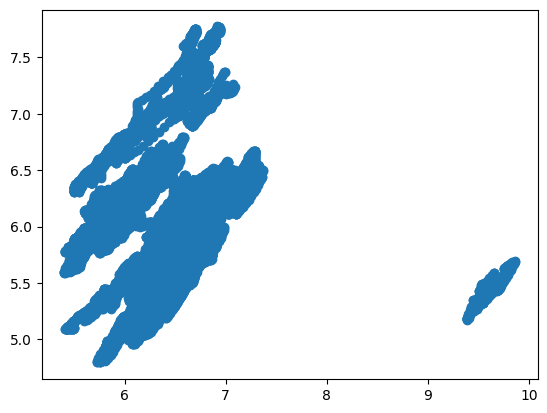

In [424]:
# observation of dt2 vs dt1
plt.scatter(fe.df["dt1"], fe.df["dt2"])

In [425]:
fe.columns_categorizing(
    columns=["CTF1", "CTF2", "CTF3"],
    value=50,
    i=1,
    e=0,
    operator="gt"
)

CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE     T2aHE1     T2aHE2  ...   Treactor  \
Timestamp                                             ...              
2020-10-13 00:15:00  30.577720  31.184706  30.858983  ...  44.161053   
2020-10-13 00:20:00  30.421470  31.033346  30.705382  ...  44.146500   
2020-10-13 12:30:00  30.268346  30.878456  30.550955  ...  44.091000   
2020-10-13 12:35:00  30.466581  31.068860  30.742637  ...  44.226789   
2020-10-13 12:40:00  30.656581  31.253750  30.927834  ...  44.391789   
...                        ...        ...        ...  ...        ...   
2023-04-14 09:35:00  28.861875  28.760569  28.639321  ...  42.235830   
2023-04-14 09:40:00  28.820625  28.719319  28.597949  ...  42.196672   
2023-04-14 09:45:00  28.775625  28.675238  28.554083  ...  42.160227   
2023-04-14 09:50:00  28.736875  28.638530  28.519001  ...  41.392704   
2023-04-14 09:55:00  28.706875  28.609780  28.487979  ...  41.369020   

                            p21         p22         p23        p24       dt1  \
Timestamp                                                                      
2020-10-13 00:15:00    0.675177  146.102220   87.335619  94.508961  5.800878   
2020-10-13 00:20:00    1.038213  145.995388   87.285864  94.495721  5.797337   
2020-10-13 12:30:00    1.038213  145.894377   87.235877  94.482230  5.784595   
2020-10-13 12:35:00    1.038213  145.837498   87.244995  94.530654  5.767610   
2020-10-13 12:40:00    0.929137  145.760904   87.280588  94.587665  5.755735   
...                         ...         ...         ...        ...       ...   
2023-04-14 09:35:00  143.743023  138.390060  139.742500   1.511547  6.340487   
2023-04-14 09:40:00  143.773760  138.406476  139.786279   1.514854  6.337154   
2023-04-14 09:45:00  143.802250  138.431877  139.863024   1.644590  6.335905   
2023-04-14 09:50:00  143.815207  138.440698  139.889700   1.339604  6.332611   
2023-04-14 09:55:00  143.824685  138.443858  139.921413   1.037521  6.341361   

                          dt2  pumps2  dt_circuits_coef  \
Timestamp                                                 
2020-10-13 00:15:00  5.975882     234          1.818212   
2020-10-13 00:20:00  5.980882     234          1.823949   
2020-10-13 12:30:00  5.972757     234          1.827244   
2020-10-13 12:35:00  5.961287     234          1.817392   
2020-10-13 12:40:00  5.952855     234          1.808866   
...                       ...     ...               ...   
2023-04-14 09:35:00  5.920326     123          2.032969   
2023-04-14 09:40:00  5.922201     123          2.034905   
2023-04-14 09:45:00  5.918493     123          2.036831   
2023-04-14 09:50:00  5.912868     123          2.038123   
2023-04-14 09:55:00  5.911618     123          2.039377   

                     dt_circuits_coef_delta  
Timestamp                                    
2020-10-13 00:15:00               20.129526  
2020-10-13 00:20:00               20.137790  
2020-10-13 12:30:00               20.098382  
2020-10-13 12:35:00           

In [426]:
fe.columns_categorizing(
    columns=["p21", "p22", "p23", "p24"],
    value=40,
    i=0,
    e=None,
    operator="lt"
)

CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE     T2aHE1     T2aHE2  ...   Treactor  \
Timestamp                                             ...              
2020-10-13 00:15:00  30.577720  31.184706  30.858983  ...  44.161053   
2020-10-13 00:20:00  30.421470  31.033346  30.705382  ...  44.146500   
2020-10-13 12:30:00  30.268346  30.878456  30.550955  ...  44.091000   
2020-10-13 12:35:00  30.466581  31.068860  30.742637  ...  44.226789   
2020-10-13 12:40:00  30.656581  31.253750  30.927834  ...  44.391789   
...                        ...        ...        ...  ...        ...   
2023-04-14 09:35:00  28.861875  28.760569  28.639321  ...  42.235830   
2023-04-14 09:40:00  28.820625  28.719319  28.597949  ...  42.196672   
2023-04-14 09:45:00  28.775625  28.675238  28.554083  ...  42.160227   
2023-04-14 09:50:00  28.736875  28.638530  28.519001  ...  41.392704   
2023-04-14 09:55:00  28.706875  28.609780  28.487979  ...  41.369020   

                            p21         p22         p23        p24       dt1  \
Timestamp                                                                      
2020-10-13 00:15:00    0.000000  146.102220   87.335619  94.508961  5.800878   
2020-10-13 00:20:00    0.000000  145.995388   87.285864  94.495721  5.797337   
2020-10-13 12:30:00    0.000000  145.894377   87.235877  94.482230  5.784595   
2020-10-13 12:35:00    0.000000  145.837498   87.244995  94.530654  5.767610   
2020-10-13 12:40:00    0.000000  145.760904   87.280588  94.587665  5.755735   
...                         ...         ...         ...        ...       ...   
2023-04-14 09:35:00  143.743023  138.390060  139.742500   0.000000  6.340487   
2023-04-14 09:40:00  143.773760  138.406476  139.786279   0.000000  6.337154   
2023-04-14 09:45:00  143.802250  138.431877  139.863024   0.000000  6.335905   
2023-04-14 09:50:00  143.815207  138.440698  139.889700   0.000000  6.332611   
2023-04-14 09:55:00  143.824685  138.443858  139.921413   0.000000  6.341361   

                          dt2  pumps2  dt_circuits_coef  \
Timestamp                                                 
2020-10-13 00:15:00  5.975882     234          1.818212   
2020-10-13 00:20:00  5.980882     234          1.823949   
2020-10-13 12:30:00  5.972757     234          1.827244   
2020-10-13 12:35:00  5.961287     234          1.817392   
2020-10-13 12:40:00  5.952855     234          1.808866   
...                       ...     ...               ...   
2023-04-14 09:35:00  5.920326     123          2.032969   
2023-04-14 09:40:00  5.922201     123          2.034905   
2023-04-14 09:45:00  5.918493     123          2.036831   
2023-04-14 09:50:00  5.912868     123          2.038123   
2023-04-14 09:55:00  5.911618     123          2.039377   

                     dt_circuits_coef_delta  
Timestamp                                    
2020-10-13 00:15:00               20.129526  
2020-10-13 00:20:00               20.137790  
2020-10-13 12:30:00               20.098382  
2020-10-13 12:35:00           

In [427]:
# makes new feature from passed columns
# if omitbelow is given excludes column from averaging
fe.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=100, feature_name="I2mean")


['p21', 'p22', 'p23', 'p24']


CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE     T2aHE1     T2aHE2  ...         p21  \
Timestamp                                             ...               
2020-10-13 00:15:00  30.577720  31.184706  30.858983  ...    0.000000   
2020-10-13 00:20:00  30.421470  31.033346  30.705382  ...    0.000000   
2020-10-13 12:30:00  30.268346  30.878456  30.550955  ...    0.000000   
2020-10-13 12:35:00  30.466581  31.068860  30.742637  ...    0.000000   
2020-10-13 12:40:00  30.656581  31.253750  30.927834  ...    0.000000   
...                        ...        ...        ...  ...         ...   
2023-04-14 09:35:00  28.861875  28.760569  28.639321  ...  143.743023   
2023-04-14 09:40:00  28.820625  28.719319  28.597949  ...  143.773760   
2023-04-14 09:45:00  28.775625  28.675238  28.554083  ...  143.802250   
2023-04-14 09:50:00  28.736875  28.638530  28.519001  ...  143.815207   
2023-04-14 09:55:00  28.706875  28.609780  28.487979  ...  143.824685   

                            p22         p23        p24       dt1       dt2  \
Timestamp                                                                    
2020-10-13 00:15:00  146.102220   87.335619  94.508961  5.800878  5.975882   
2020-10-13 00:20:00  145.995388   87.285864  94.495721  5.797337  5.980882   
2020-10-13 12:30:00  145.894377   87.235877  94.482230  5.784595  5.972757   
2020-10-13 12:35:00  145.837498   87.244995  94.530654  5.767610  5.961287   
2020-10-13 12:40:00  145.760904   87.280588  94.587665  5.755735  5.952855   
...                         ...         ...        ...       ...       ...   
2023-04-14 09:35:00  138.390060  139.742500   0.000000  6.340487  5.920326   
2023-04-14 09:40:00  138.406476  139.786279   0.000000  6.337154  5.922201   
2023-04-14 09:45:00  138.431877  139.863024   0.000000  6.335905  5.918493   
2023-04-14 09:50:00  138.440698  139.889700   0.000000  6.332611  5.912868   
2023-04-14 09:55:00  138.443858  139.921413   0.000000  6.341361  5.911618   

                     pumps2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                               
2020-10-13 00:15:00     234          1.818212               20.129526   
2020-10-13 00:20:00     234          1.823949               20.137790   
2020-10-13 12:30:00     234          1.827244               20.098382   
2020-10-13 12:35:00     234          1.817392               20.030441   
2020-10-13 12:40:00     234          1.808866               19.982010   
...                     ...               ...                     ...   
2023-04-14 09:35:00     123          2.032969               23.697909   
2023-04-14 09:40:00     123          2.034905               23.697701   
2023-04-14 09:45:00     123          2.036831               23.698993   
2023-04-14 09:50:00     123          2.038123               23.694118   
2023-04-14 09:55:00     123          2.039377               23.692868   

                         I2mean  
Timestamp                        
2020-10-13 00:15:00  14

In [428]:
# fe.pumps_normalizer("Q2")

In [429]:
fe.make_QbyIP()
# fe11.make_QbyIP()
# fe12.make_QbyIP()

CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE     T2aHE1     T2aHE2  ...         p22  \
Timestamp                                             ...               
2020-10-13 00:15:00  30.577720  31.184706  30.858983  ...  146.102220   
2020-10-13 00:20:00  30.421470  31.033346  30.705382  ...  145.995388   
2020-10-13 12:30:00  30.268346  30.878456  30.550955  ...  145.894377   
2020-10-13 12:35:00  30.466581  31.068860  30.742637  ...  145.837498   
2020-10-13 12:40:00  30.656581  31.253750  30.927834  ...  145.760904   
...                        ...        ...        ...  ...         ...   
2023-04-14 09:35:00  28.861875  28.760569  28.639321  ...  138.390060   
2023-04-14 09:40:00  28.820625  28.719319  28.597949  ...  138.406476   
2023-04-14 09:45:00  28.775625  28.675238  28.554083  ...  138.431877   
2023-04-14 09:50:00  28.736875  28.638530  28.519001  ...  138.440698   
2023-04-14 09:55:00  28.706875  28.609780  28.487979  ...  138.443858   

                            p23        p24       dt1       dt2  pumps2  \
Timestamp                                                                
2020-10-13 00:15:00   87.335619  94.508961  5.800878  5.975882     234   
2020-10-13 00:20:00   87.285864  94.495721  5.797337  5.980882     234   
2020-10-13 12:30:00   87.235877  94.482230  5.784595  5.972757     234   
2020-10-13 12:35:00   87.244995  94.530654  5.767610  5.961287     234   
2020-10-13 12:40:00   87.280588  94.587665  5.755735  5.952855     234   
...                         ...        ...       ...       ...     ...   
2023-04-14 09:35:00  139.742500   0.000000  6.340487  5.920326     123   
2023-04-14 09:40:00  139.786279   0.000000  6.337154  5.922201     123   
2023-04-14 09:45:00  139.863024   0.000000  6.335905  5.918493     123   
2023-04-14 09:50:00  139.889700   0.000000  6.332611  5.912868     123   
2023-04-14 09:55:00  139.921413   0.000000  6.341361  5.911618     123   

                     dt_circuits_coef  dt_circuits_coef_delta      I2mean  \
Timestamp                                                                   
2020-10-13 00:15:00          1.818212               20.129526  146.102220   
2020-10-13 00:20:00          1.823949               20.137790  145.995388   
2020-10-13 12:30:00          1.827244               20.098382  145.894377   
2020-10-13 12:35:00          1.817392               20.030441  145.837498   
2020-10-13 12:40:00          1.808866               19.982010  145.760904   
...                               ...                     ...         ...   
2023-04-14 09:35:00          2.032969               23.697909  140.625194   
2023-04-14 09:40:00          2.034905               23.697701  140.655505   
2023-04-14 09:45:00          2.036831               23.698993  140.699050   
2023-04-14 09:50:00          2.038123               23.694118  140.715202   
2023-04-14 09:55:00          2.039377               23.692868  140.729986   

                         QbyIP  
Timestamp                       
2020-10-13 00:15:00  11.1

In [430]:
fe.make_dts_on_HEs()
# fe11.make_dts_on_HEs()
# fe12.make_dts_on_HEs()

CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE    T2aHE1    T2aHE2  ...         p22  \
Timestamp                                           ...               
2020-10-13 00:15:00  30.577720  0.327025  0.310844  ...  146.102220   
2020-10-13 00:20:00  30.421470  0.327382  0.311096  ...  145.995388   
2020-10-13 12:30:00  30.268346  0.327532  0.311237  ...  145.894377   
2020-10-13 12:35:00  30.466581  0.327680  0.311393  ...  145.837498   
2020-10-13 12:40:00  30.656581  0.327796  0.311486  ...  145.760904   
...                        ...       ...       ...  ...         ...   
2023-04-14 09:35:00  28.861875  0.245550  0.240434  ...  138.390060   
2023-04-14 09:40:00  28.820625  0.245631  0.240510  ...  138.406476   
2023-04-14 09:45:00  28.775625  0.245500  0.240388  ...  138.431877   
2023-04-14 09:50:00  28.736875  0.245399  0.240355  ...  138.440698   
2023-04-14 09:55:00  28.706875  0.245412  0.240272  ...  138.443858   

                            p23        p24       dt1       dt2  pumps2  \
Timestamp                                                                
2020-10-13 00:15:00   87.335619  94.508961  5.800878  5.975882     234   
2020-10-13 00:20:00   87.285864  94.495721  5.797337  5.980882     234   
2020-10-13 12:30:00   87.235877  94.482230  5.784595  5.972757     234   
2020-10-13 12:35:00   87.244995  94.530654  5.767610  5.961287     234   
2020-10-13 12:40:00   87.280588  94.587665  5.755735  5.952855     234   
...                         ...        ...       ...       ...     ...   
2023-04-14 09:35:00  139.742500   0.000000  6.340487  5.920326     123   
2023-04-14 09:40:00  139.786279   0.000000  6.337154  5.922201     123   
2023-04-14 09:45:00  139.863024   0.000000  6.335905  5.918493     123   
2023-04-14 09:50:00  139.889700   0.000000  6.332611  5.912868     123   
2023-04-14 09:55:00  139.921413   0.000000  6.341361  5.911618     123   

                     dt_circuits_coef  dt_circuits_coef_delta      I2mean  \
Timestamp                                                                   
2020-10-13 00:15:00          1.818212               20.129526  146.102220   
2020-10-13 00:20:00          1.823949               20.137790  145.995388   
2020-10-13 12:30:00          1.827244               20.098382  145.894377   
2020-10-13 12:35:00          1.817392               20.030441  145.837498   
2020-10-13 12:40:00          1.808866               19.982010  145.760904   
...                               ...                     ...         ...   
2023-04-14 09:35:00          2.032969               23.697909  140.625194   
2023-04-14 09:40:00          2.034905               23.697701  140.655505   
2023-04-14 09:45:00          2.036831               23.698993  140.699050   
2023-04-14 09:50:00          2.038123               23.694118  140.715202   
2023-04-14 09:55:00          2.039377               23.692868  140.729986   

                         QbyIP  
Timestamp                       
2020-10-13 00:15:00  11.104639  
2020-10-13 00:20:0

# The data above are in range of 14.10.2020-14.04.2023
## Annually few or all HE's were under fouling remove services to increase cooling system efficiency
## Reactor onpower dates are
### [ (2019-08-22, 2020-06-29), (2020-10-12, 2021-07-02), (2021-09-06, 2022-07-01), (2022-09-05, 2023-04-14) ]
## The dates of HE's onpower cycles are
### HE1 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE2 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE3 [ ( 2020-10-12, 2021-06-01 ), ( 2022-03-14, 2023-04-14 ) ]
### HE4 [ ( 2019-10-14, 2021-06-01 ), ( 2021-06-21, 2022-03-14 ), (2022-09-05, 2023-04-14) ]
### HE5 [ ( 2020-06-08, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ) ]

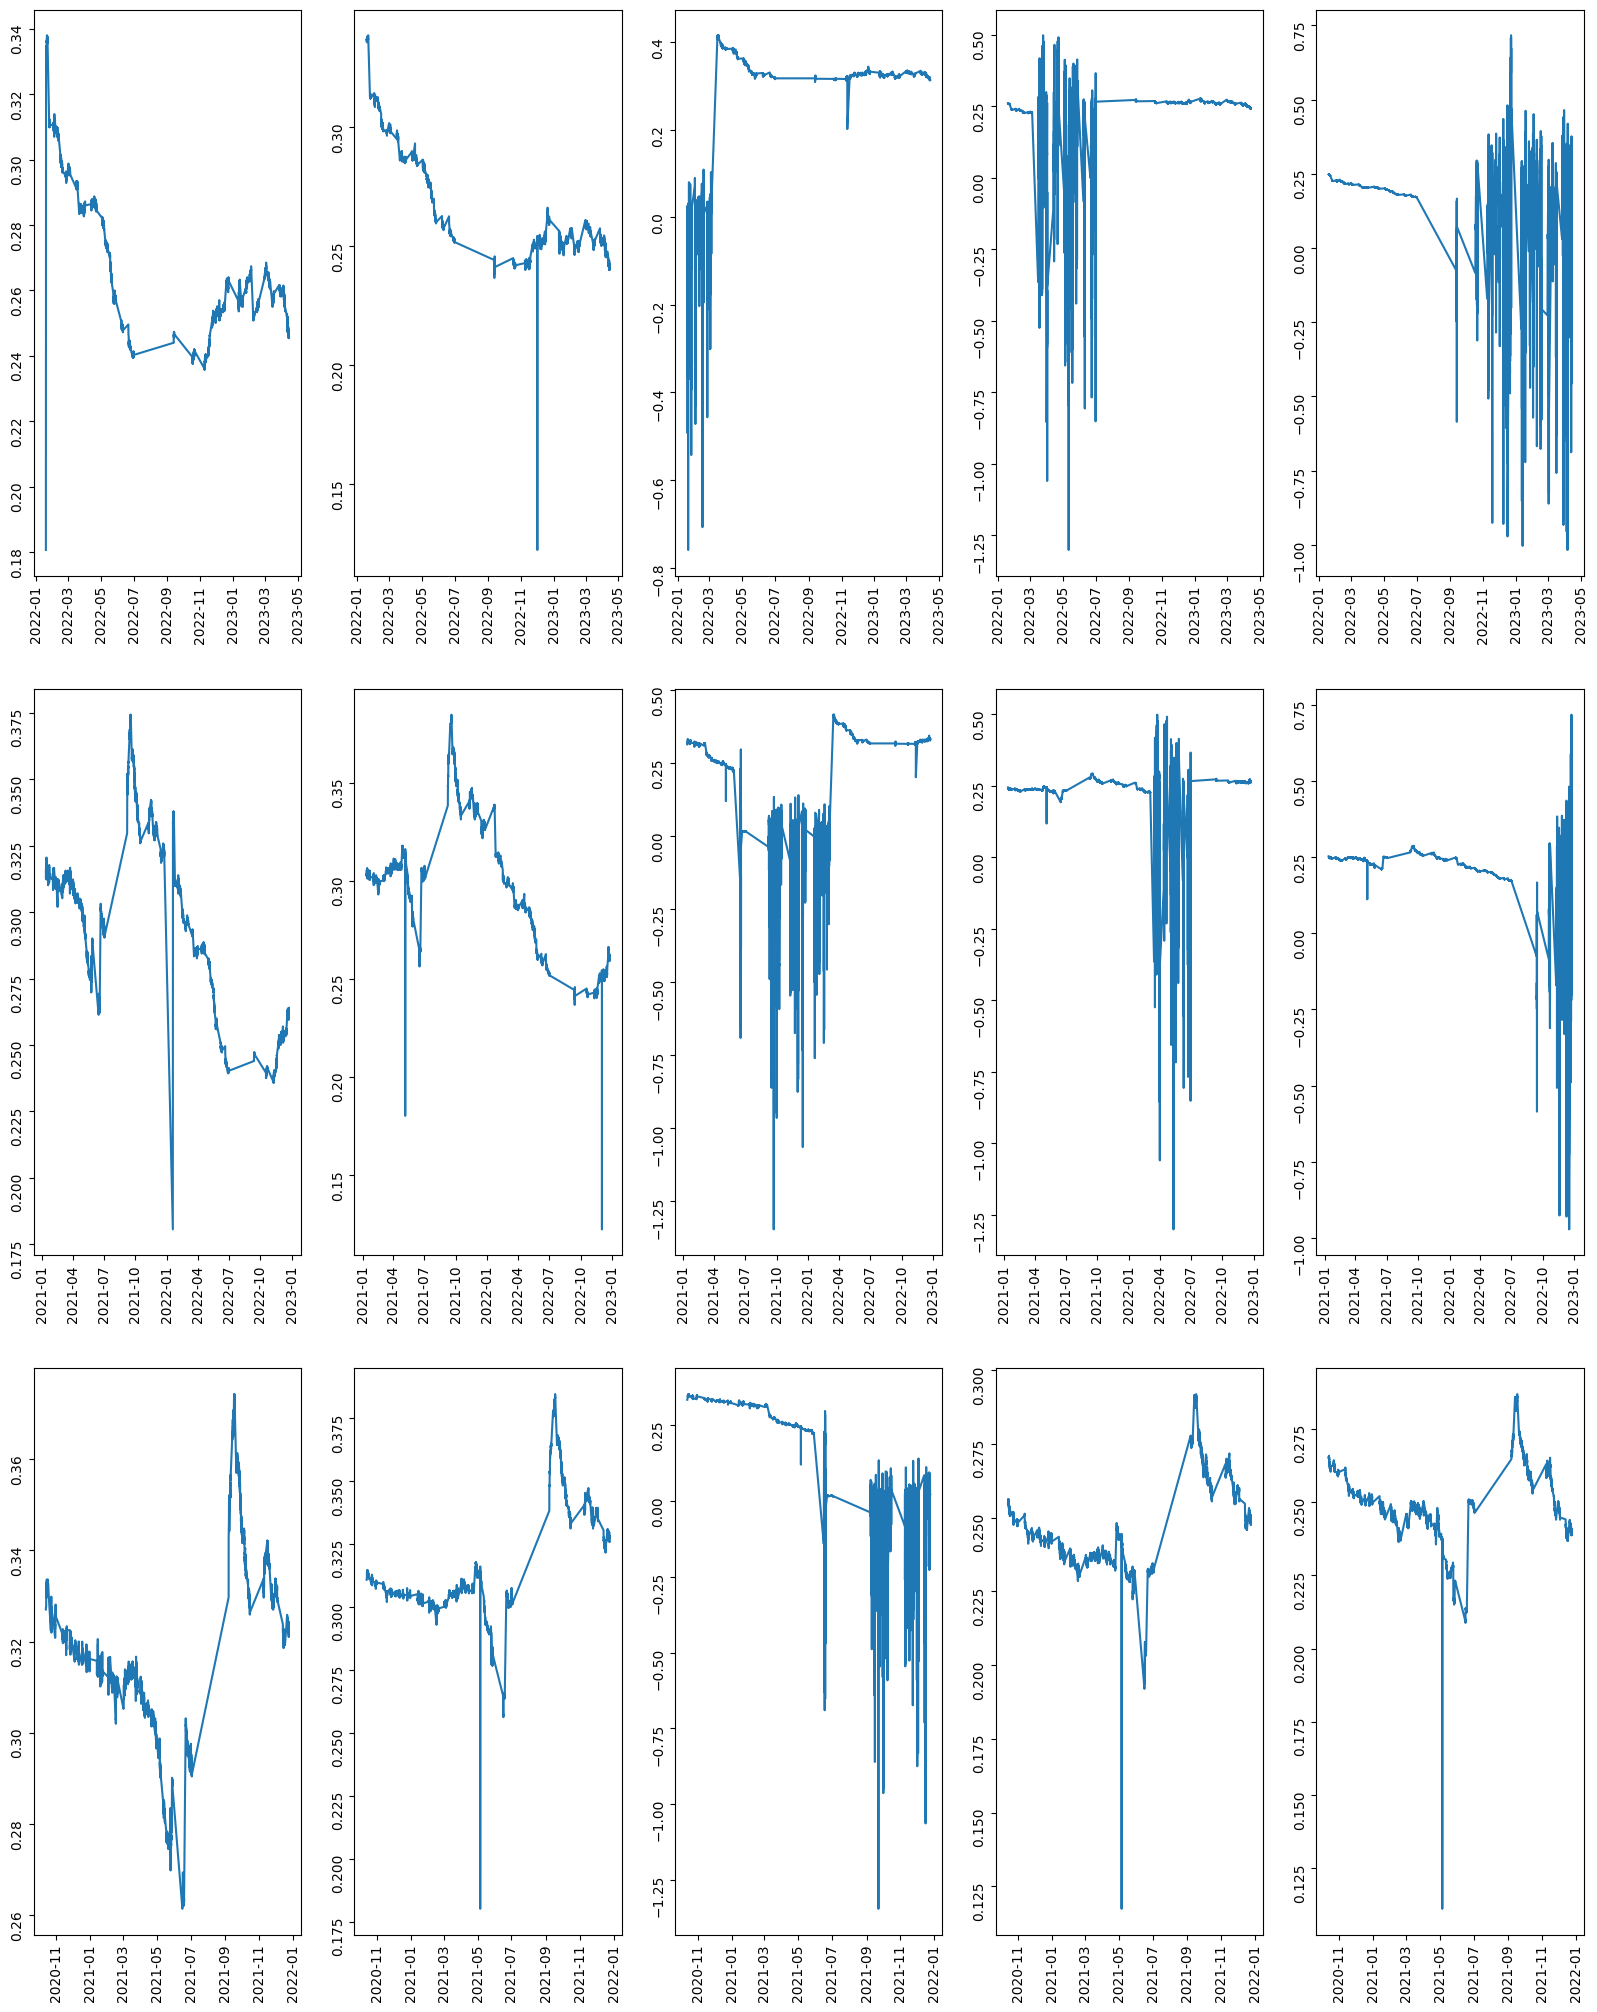

In [431]:
fig, axs = plt.subplots(3,5, figsize=(20,25))

axs[0][0].plot(fe.df.loc["2022":"2023", "T2aHE1"])
axs[0][1].plot(fe.df.loc["2022":"2023", "T2aHE2"])
axs[0][2].plot(fe.df.loc["2022":"2023", "T2aHE3"])
axs[0][3].plot(fe.df.loc["2022":"2023", "T2aHE4"])
axs[0][4].plot(fe.df.loc["2022":"2023", "T2aHE5"])

axs[1][0].plot(fe.df.loc["2021":"2022", "T2aHE1"])
axs[1][1].plot(fe.df.loc["2021":"2022", "T2aHE2"])
axs[1][2].plot(fe.df.loc["2021":"2022", "T2aHE3"])
axs[1][3].plot(fe.df.loc["2021":"2022", "T2aHE4"])
axs[1][4].plot(fe.df.loc["2021":"2022", "T2aHE5"])

axs[2][0].plot(fe.df.loc["2020":"2021", "T2aHE1"])
axs[2][1].plot(fe.df.loc["2020":"2021", "T2aHE2"])
axs[2][2].plot(fe.df.loc["2020":"2021", "T2aHE3"])
axs[2][3].plot(fe.df.loc["2020":"2021", "T2aHE4"])
axs[2][4].plot(fe.df.loc["2020":"2021", "T2aHE5"])

for i in range(3):
    for j in range(5):
        axs[i][j].tick_params(rotation=90)

In [432]:

he1 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he2 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he3 = [("2020-10-12", "2021-06-01"), ("2022-03-14", "2023-04-14")]
he4 = [("2019-10-14", "2021-06-01"), ("2021-06-21", "2022-03-14" ), ("2022-09-05", "2023-04-14")]
he5 = [("2020-06-08", "2021-07-02"), ("2021-09-06", "2022-07-01")]

# there is a bug when start argument is higher than 1000
fe.make_time_onpower_feature(time_periods=he1, feature_name="HE1_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"]+ 2915

fe.make_time_onpower_feature(time_periods=he2, feature_name="HE2_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"]+ 2915

fe.make_time_onpower_feature(time_periods=he3, feature_name="HE3_TOP")


fe.make_time_onpower_feature(time_periods=he4, feature_name="HE4_TOP")

fe.make_time_onpower_feature(time_periods=he5, feature_name="HE5_TOP")


CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE    T2aHE1    T2aHE2  ...  pumps2  \
Timestamp                                           ...           
2020-10-13 00:15:00  30.577720  0.327025  0.310844  ...     234   
2020-10-13 00:20:00  30.421470  0.327382  0.311096  ...     234   
2020-10-13 12:30:00  30.268346  0.327532  0.311237  ...     234   
2020-10-13 12:35:00  30.466581  0.327680  0.311393  ...     234   
2020-10-13 12:40:00  30.656581  0.327796  0.311486  ...     234   
...                        ...       ...       ...  ...     ...   
2023-04-14 09:35:00  28.861875  0.245550  0.240434  ...     123   
2023-04-14 09:40:00  28.820625  0.245631  0.240510  ...     123   
2023-04-14 09:45:00  28.775625  0.245500  0.240388  ...     123   
2023-04-14 09:50:00  28.736875  0.245399  0.240355  ...     123   
2023-04-14 09:55:00  28.706875  0.245412  0.240272  ...     123   

                     dt_circuits_coef  dt_circuits_coef_delta      I2mean  \
Timestamp                                                                   
2020-10-13 00:15:00          1.818212               20.129526  146.102220   
2020-10-13 00:20:00          1.823949               20.137790  145.995388   
2020-10-13 12:30:00          1.827244               20.098382  145.894377   
2020-10-13 12:35:00          1.817392               20.030441  145.837498   
2020-10-13 12:40:00          1.808866               19.982010  145.760904   
...                               ...                     ...         ...   
2023-04-14 09:35:00          2.032969               23.697909  140.625194   
2023-04-14 09:40:00          2.034905               23.697701  140.655505   
2023-04-14 09:45:00          2.036831               23.698993  140.699050   
2023-04-14 09:50:00          2.038123               23.694118  140.715202   
2023-04-14 09:55:00          2.039377               23.692868  140.729986   

                         QbyIP      HE1_TOP      HE2_TOP      HE3_TOP  \
Timestamp                                                               
2020-10-13 00:15:00  11.104639  2915.238244  2915.238244     0.232864   
2020-10-13 00:20:00  11.115077  2915.476487  2915.476487     0.465729   
2020-10-13 12:30:00  11.127999  2915.714731  2915.714731     0.698593   
2020-10-13 12:35:00  11.135082  2915.952974  2915.952974     0.931457   
2020-10-13 12:40:00  11.144792  2916.191218  2916.191218     1.164322   
...                        ...          ...          ...          ...   
2023-04-14 09:35:00   9.670283  5127.113826  5127.113826  9472.145191   
2023-04-14 09:40:00   9.669014  5127.418703  5127.418703  9472.483893   
2023-04-14 09:45:00   9.666318  5127.723580  5127.723580  9472.822596   
2023-04-14 09:50:00   9.664986  5128.028456  5128.028456  9473.161298   
2023-04-14 09:55:00   9.662934  5128.333333  5128.333333  9473.500000   

                         HE4_TOP   HE5_TOP  
Timestamp                                   
2020-10-13 00:15:00     0.232864  0.238244  
2020-10-13 00:20:00     0.465729  0.476487  
20

In [433]:
# Important step must be added to package/module

fe.df["HE1_status"] = np.zeros(len(fe.df))
fe.df["HE2_status"] = np.zeros(len(fe.df))
fe.df["HE3_status"] = np.zeros(len(fe.df))
fe.df["HE4_status"] = np.zeros(len(fe.df))
fe.df["HE5_status"] = np.zeros(len(fe.df))

fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0

fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE2"][fe.df.loc[:, "HE2_TOP"] == 0] = 0

fe.df.loc[:, "HE3_status"][fe.df.loc[:, "HE3_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE3"][fe.df.loc[:, "HE3_TOP"] == 0] = 0

fe.df.loc[:, "HE4_status"][fe.df.loc[:, "HE4_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE4"][fe.df.loc[:, "HE4_TOP"] == 0] = 0

fe.df.loc[:, "HE5_status"][fe.df.loc[:, "HE5_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE5"][fe.df.loc[:, "HE5_TOP"] == 0] = 0


/tmp/ipykernel_6148/2441187994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
/tmp/ipykernel_6148/2441187994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0
/tmp/ipykernel_6148/2441187994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
/tmp/ipyk

In [435]:
# fe.df["pumps2"] = fe.df["pumps2"].astype(str)

fe.df["QbyIP_HEs_num"] = fe.df["QbyIP"]/fe.df.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)
fe.df["QbyIP_HEs_pumps_num"] = fe.df.apply(lambda x: x["QbyIP_HEs_num"] / len(x["pumps2"].astype(str)), axis=1)


In [436]:

fe.make_heat_dissipation(feature_name="Ndis_def", dt_norm=False)
fe.make_heat_dissipation(feature_name="Ndis_by_delta", dt_norm=False)

CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE    T2aHE1    T2aHE2  ...   HE5_TOP  HE1_status  \
Timestamp                                           ...                         
2020-10-13 00:15:00  30.577720  0.327025  0.310844  ...  0.238244         1.0   
2020-10-13 00:20:00  30.421470  0.327382  0.311096  ...  0.476487         1.0   
2020-10-13 12:30:00  30.268346  0.327532  0.311237  ...  0.714731         1.0   
2020-10-13 12:35:00  30.466581  0.327680  0.311393  ...  0.952974         1.0   
2020-10-13 12:40:00  30.656581  0.327796  0.311486  ...  1.191218         1.0   
...                        ...       ...       ...  ...       ...         ...   
2023-04-14 09:35:00  28.861875  0.245550  0.240434  ...  0.000000         1.0   
2023-04-14 09:40:00  28.820625  0.245631  0.240510  ...  0.000000         1.0   
2023-04-14 09:45:00  28.775625  0.245500  0.240388  ...  0.000000         1.0   
2023-04-14 09:50:00  28.736875  0.245399  0.240355  ...  0.000000         1.0   
2023-04-14 09:55:00  28.706875  0.245412  0.240272  ...  0.000000         1.0   

                     HE2_status  HE3_status  HE4_status  HE5_status  \
Timestamp                                                             
2020-10-13 00:15:00         1.0         1.0         1.0         1.0   
2020-10-13 00:20:00         1.0         1.0         1.0         1.0   
2020-10-13 12:30:00         1.0         1.0         1.0         1.0   
2020-10-13 12:35:00         1.0         1.0         1.0         1.0   
2020-10-13 12:40:00         1.0         1.0         1.0         1.0   
...                         ...         ...         ...         ...   
2023-04-14 09:35:00         1.0         1.0         1.0         0.0   
2023-04-14 09:40:00         1.0         1.0         1.0         0.0   
2023-04-14 09:45:00         1.0         1.0         1.0         0.0   
2023-04-14 09:50:00         1.0         1.0         1.0         0.0   
2023-04-14 09:55:00         1.0         1.0         1.0         0.0   

                     QbyIP_HEs_num  QbyIP_HEs_pumps_num   Ndis_def  \
Timestamp                                                            
2020-10-13 00:15:00       2.220928             0.444186  66.360017   
2020-10-13 00:20:00       2.223015             0.444603  66.477966   
2020-10-13 12:30:00       2.225600             0.445120  66.464837   
2020-10-13 12:35:00       2.227016             0.445403  66.379416   
2020-10-13 12:40:00       2.228958             0.445792  66.343336   
...                            ...                  ...        ...   
2023-04-14 09:35:00       2.417571             0.483514  57.251227   
2023-04-14 09:40:00       2.417253             0.483451  57.261843   
2023-04-14 09:45:00       2.416579             0.483316  57.210029   
2023-04-14 09:50:00       2.416246             0.483249  57.147782   
2023-04-14 09:55:00       2.415734             0.483147  57.123573   

                     Ndis_by_delta  
Timestamp                           
2020-10-13 00:15:00      66.360017  
2020-1

In [437]:
fe.df["Ndis_by_delta"] = fe.df["Ndis_by_delta"] / fe.df["dt_circuits_coef_delta"] 
fe.df["Ndis_by_del_HEs_num"] = fe.df["Ndis_by_delta"] / fe.df.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)


(array([18536., 18628., 18718., 18809., 18901., 18993., 19083., 19174.,
        19266., 19358., 19448.]),
 [Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04')])

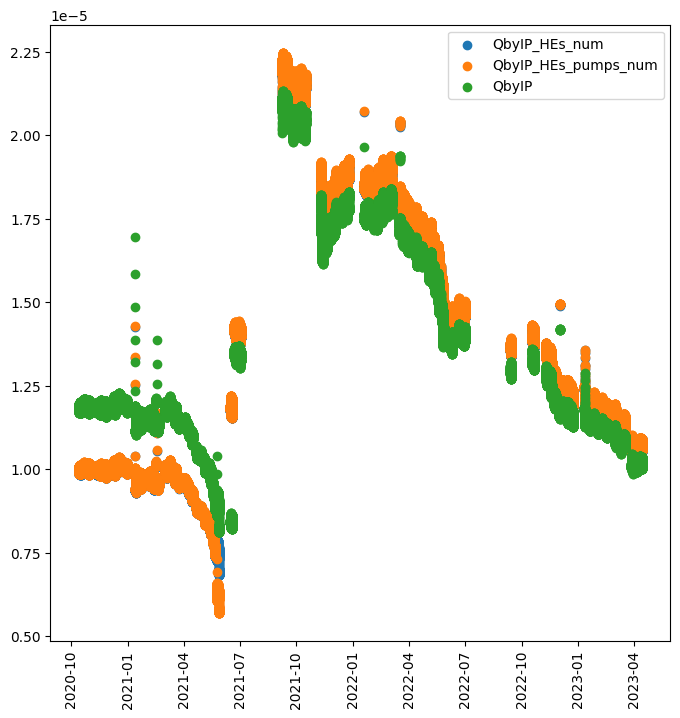

In [438]:
plt.figure(figsize=(8,8))

plt.scatter(
    fe.df.index, 
    fe.df["QbyIP_HEs_num"]/fe.df["QbyIP_HEs_num"].sum(),
    label="QbyIP_HEs_num"
)
plt.scatter(
    fe.df.index, 
    fe.df["QbyIP_HEs_pumps_num"]/fe.df["QbyIP_HEs_pumps_num"].sum(),
    label="QbyIP_HEs_pumps_num"
)
plt.scatter(
    fe.df.index, 
    fe.df["QbyIP"]/fe.df["QbyIP"].sum(),
    label="QbyIP"
)
plt.legend()
plt.xticks(rotation=90)

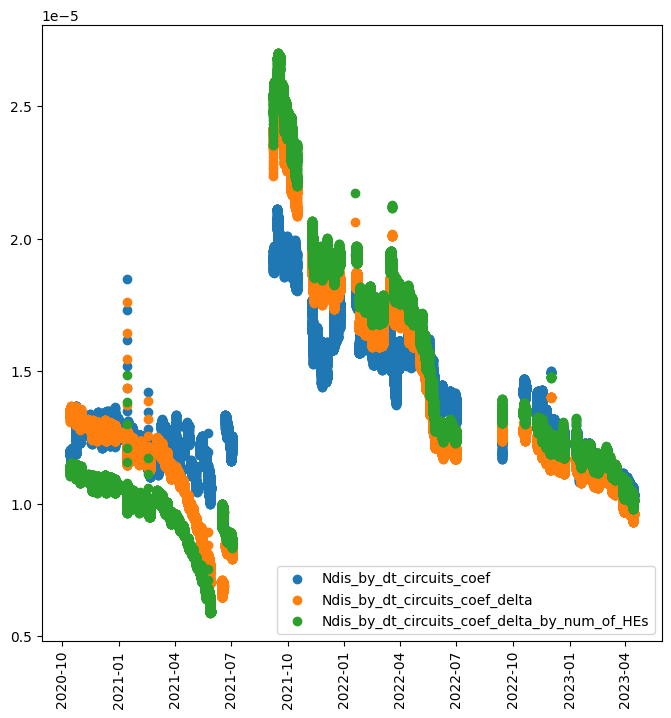

In [439]:
plt.figure(figsize=(8,8))
# plt.scatter(fe12.df.index, fe12.df["Ndis"])
# plt.scatter(fe11.df.index, fe11.df["Ndis"])
plt.scatter(
    fe.df.index, 
    fe.df["Ndis_def"]/fe.df["Ndis_def"].sum(),
    label="Ndis_by_dt_circuits_coef"
)
plt.scatter(
    fe.df.index, 
    fe.df["Ndis_by_delta"]/fe.df["Ndis_by_delta"].sum(),
    label="Ndis_by_dt_circuits_coef_delta"
)
plt.scatter(
    fe.df.index, 
    fe.df["Ndis_by_del_HEs_num"]/fe.df["Ndis_by_del_HEs_num"].sum(),
    label="Ndis_by_dt_circuits_coef_delta_by_num_of_HEs"
)
plt.xticks(rotation=90)
plt.legend()

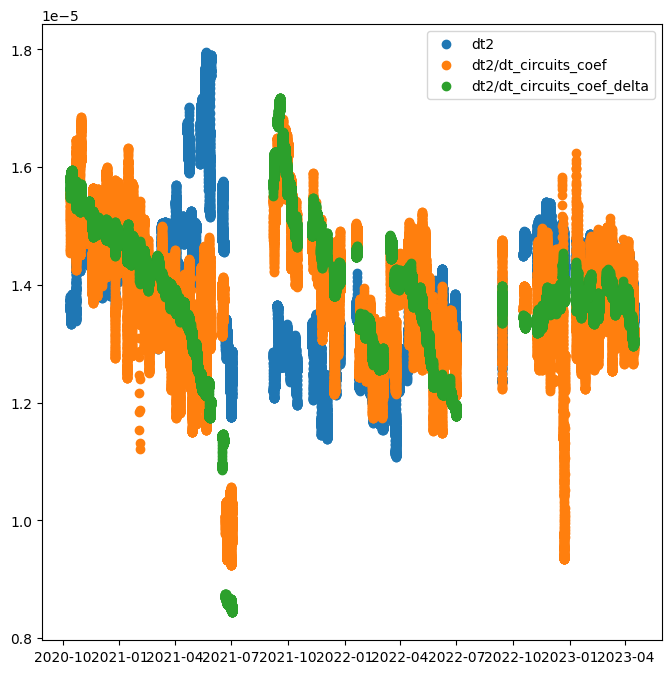

In [440]:
# damn, normalizing by delta coefficient makes it so smooth

plt.figure(figsize=(8,8))
plt.scatter(
    fe.df.index, 
    fe.df["dt2"]/fe.df["dt2"].sum(),
    label="dt2"
)

dt_norm = fe.df["dt2"]/fe.df["dt_circuits_coef"]

plt.scatter(
    fe.df.index, 
    dt_norm/dt_norm.sum(),
    label="dt2/dt_circuits_coef"
)

dt_norm2 = fe.df["dt2"]/fe.df["dt_circuits_coef_delta"]

plt.scatter(
    fe.df.index, 
    dt_norm2/dt_norm2.sum(),
    label="dt2/dt_circuits_coef_delta"
)


plt.legend()

# dt2 data is skewed on 2021-07 because of HE3. Back than HE3 was not under operation but second loop valve was opened for a long time. 
# As a result cold water went through HE and cooled up the rest of water

# Correct data for dt2 may be obtained by averaging HEs data
# The plots below display dt on HEs and average dt

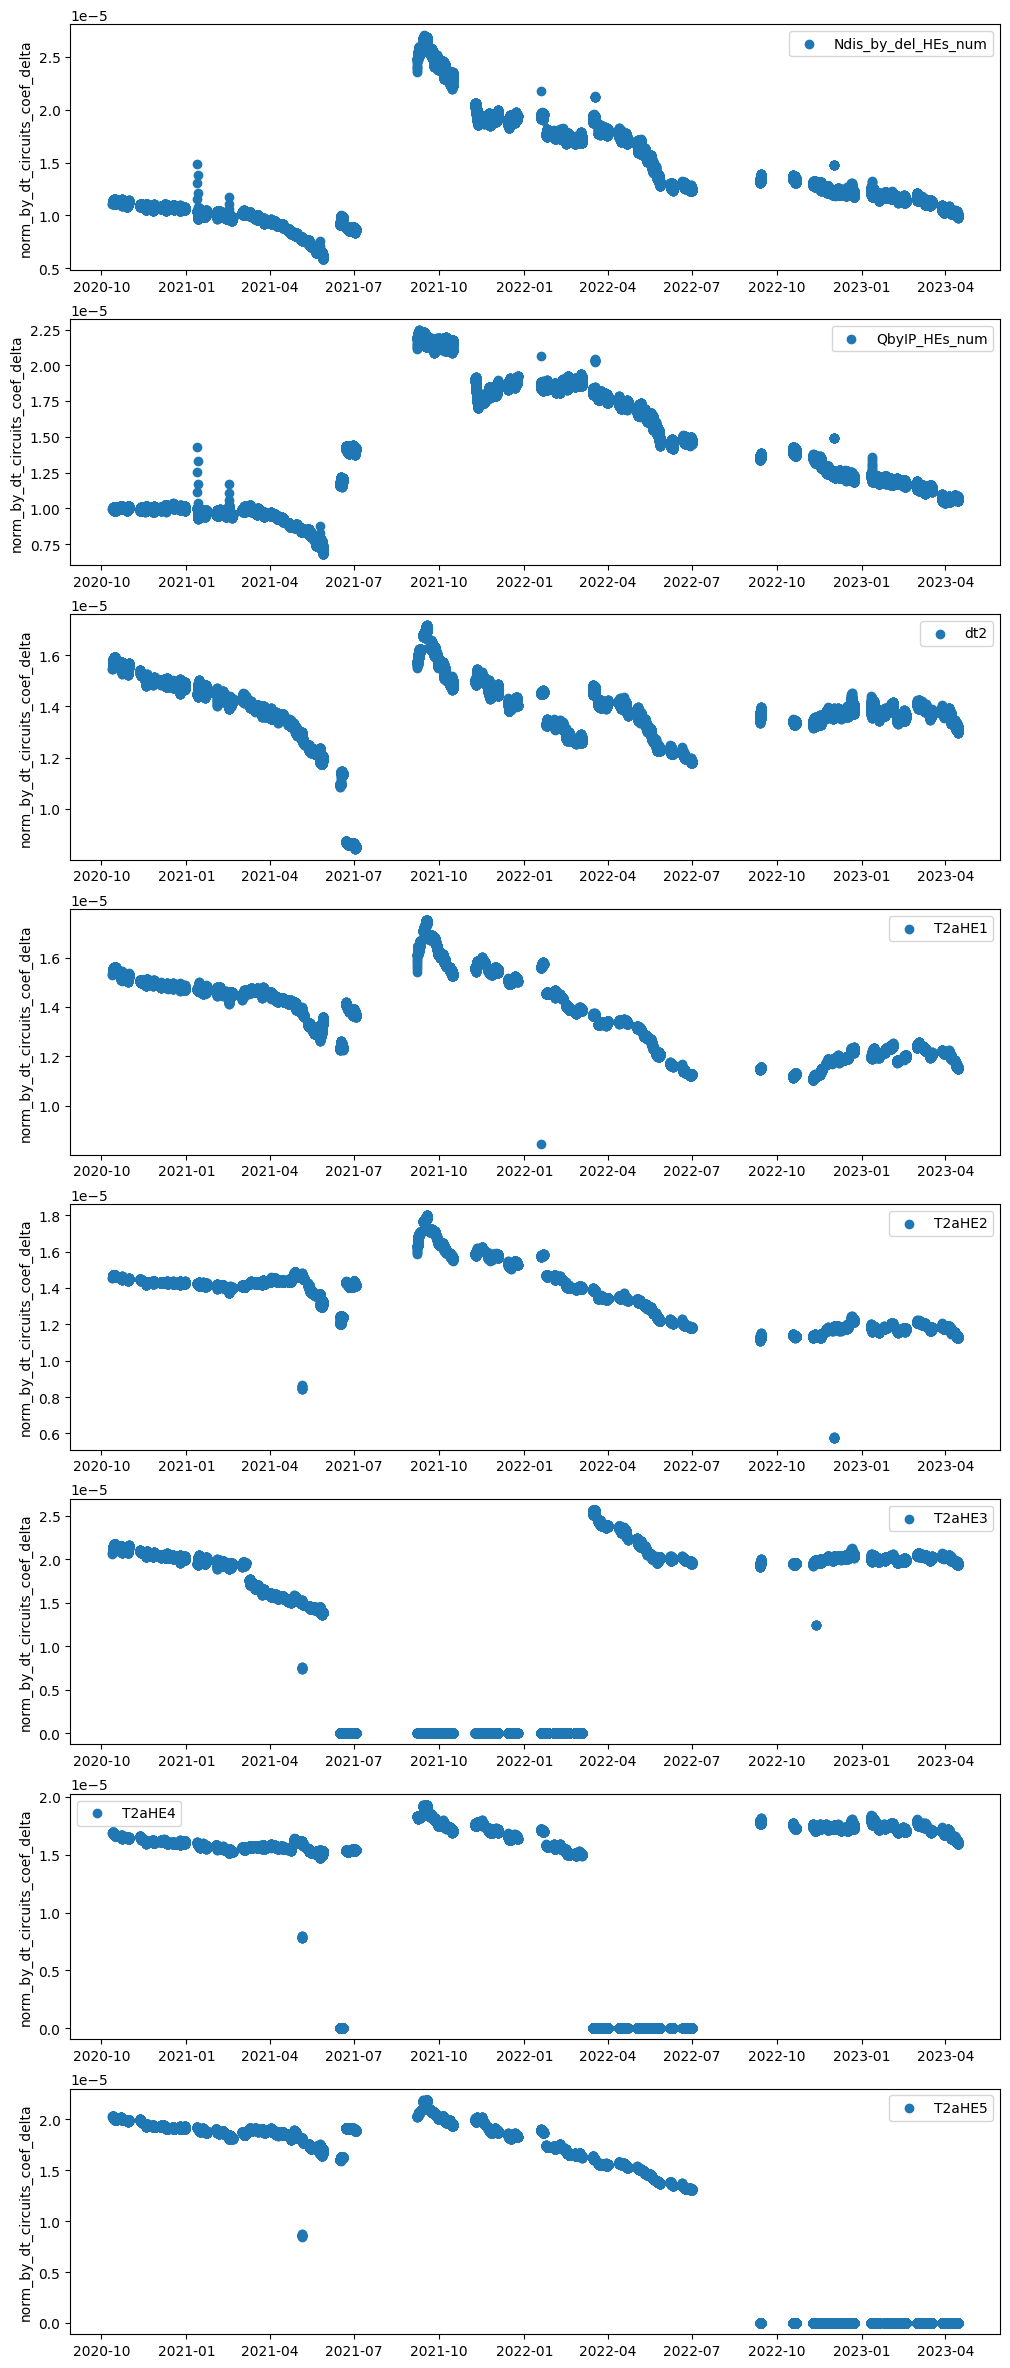

In [441]:

# plt.figure(figsize=(8,8))
itr = ["Ndis_by_del_HEs_num", "QbyIP_HEs_num", "dt2", "T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]

fig, axs = plt.subplots(len(itr),1, figsize=(12,30))

for i in range(len(itr)):
    
    if itr[i] == "dt2":
        axs[i].scatter(fe.df.index,
                       (fe.df[itr[i]]/fe.df["dt_circuits_coef_delta"])
                       /(fe.df[itr[i]]/fe.df["dt_circuits_coef_delta"]).sum(),
                       label=itr[i])
    else:
        axs[i].scatter(fe.df.index, fe.df[itr[i]]/fe.df[itr[i]].sum(), label=itr[i])
    axs[i].set_ylabel("norm_by_dt_circuits_coef_delta")
    axs[i].legend()


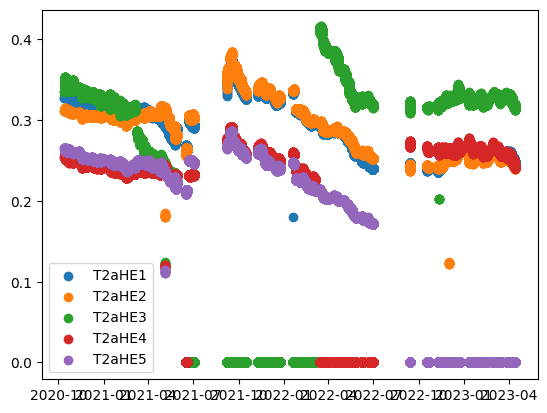

In [442]:
itr = ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]

# fig, axs = plt.subplots(len(itr),1, figsize=(12,30))

for i in range(len(itr)):
    plt.scatter(fe.df.index, fe.df[itr[i]], label=itr[i])
    
    plt.legend()

In [443]:
# averaging by HEs
fe.df["dt2_by_HEs"] = fe.df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]][
    fe.df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]] > 0].mean(axis=1)

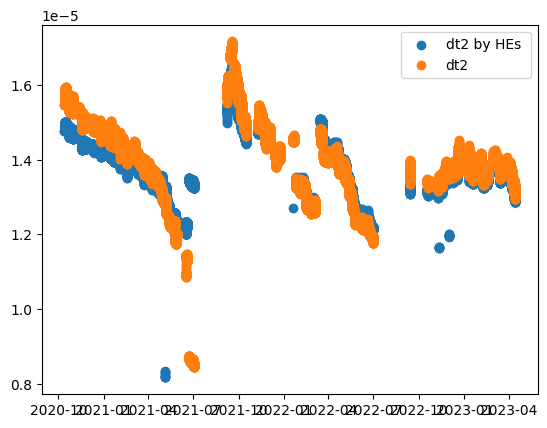

In [444]:


plt.scatter(fe.df.index, fe.df["dt2_by_HEs"]/fe.df["dt2_by_HEs"].sum(), label="dt2 by HEs ")
plt.scatter(fe.df.index, 
               (fe.df["dt2"]/fe.df["dt_circuits_coef_delta"])
               /(fe.df["dt2"]/fe.df["dt_circuits_coef_delta"]).sum(),
            label="dt2"
)
plt.legend()

In [445]:
# lets define coef of fouiling


# 1 - "2020-10-12","2020-10-16"
# 2 - "2021-09-06","2022-06-28"
# 3 - "2022-09-12","2022-09-13"
first = ("2020-10-12","2020-10-16")
second = ("2021-09-06","2021-09-10")
third = ("2022-09-12","2022-09-13")

first_cycle = ("2020-10-12", "2021-07-02")
second_cycle = ("2021-09-06", "2022-06-28")
third_cycle = ("2022-09-12", "2023-04-14")

# so there are 3 cycles -> 3 starting points for fouling assessment
ff1_0 = fe.df.loc[first[0]: first[1], "Ndis_by_del_HEs_num"].max()
ff2_0 = fe.df.loc[second[0]: second[1], "Ndis_by_del_HEs_num"].max()
ff3_0 = fe.df.loc[third[0]: third[1], "Ndis_by_del_HEs_num"].max()

fe.df["ff"] = np.zeros(len(fe.df),)

# fe.df.loc[first_cycle[0]: first_cycle[1], "ff"] = 1/fe.df.loc[first_cycle[0]: first_cycle[1], "Ndis"] -  1/ff1_0
# fe.df.loc[second_cycle[0]: second_cycle[1], "ff"] = 1/fe.df.loc[second_cycle[0]: second_cycle[1], "Ndis"] -  1/ff2_0
# fe.df.loc[third_cycle[0]: third_cycle[1], "ff"] = 1/fe.df.loc[third_cycle[0]: third_cycle[1], "Ndis"] -  1/ff3_0

fe.df.loc[first_cycle[0]: first_cycle[1], "ff"] = fe.df.loc[first_cycle[0]: first_cycle[1], "Ndis_by_del_HEs_num"] / ff1_0
fe.df.loc[second_cycle[0]: second_cycle[1], "ff"] = fe.df.loc[second_cycle[0]: second_cycle[1], "Ndis_by_del_HEs_num"] / ff2_0
fe.df.loc[third_cycle[0]: third_cycle[1], "ff"] = fe.df.loc[third_cycle[0]: third_cycle[1], "Ndis_by_del_HEs_num"] / ff3_0

In [446]:
# there are outliners if zcore good to clean it
fe.filter_by_zscore("ff")

CTF1  CTF2  CTF3    P2       Q2      T1aHE      T1bHE  \
Timestamp                                                                    
2020-10-13 00:15:00     0     1     0  0.40  648.965  38.930486  44.731365   
2020-10-13 00:20:00     0     1     0  0.40  649.100  38.781042  44.578379   
2020-10-13 12:30:00     0     1     0  0.40  649.405  38.609375  44.393971   
2020-10-13 12:35:00     0     1     0  0.40  649.565  38.768125  44.535735   
2020-10-13 12:40:00     0     1     0  0.40  649.790  38.930000  44.685735   
...                   ...   ...   ...   ...      ...        ...        ...   
2023-04-14 09:35:00     0     1     0  0.48  652.745  40.298971  46.639458   
2023-04-14 09:40:00     0     1     0  0.48  652.800  40.258971  46.596125   
2023-04-14 09:45:00     0     1     0  0.48  652.820  40.220220  46.556125   
2023-04-14 09:50:00     0     1     0  0.48  652.805  40.185514  46.518125   
2023-04-14 09:55:00     0     1     0  0.48  652.735  40.146764  46.488125   

                         T2aHE    T2aHE1    T2aHE2  ...  HE3_status  \
Timestamp                                           ...               
2020-10-13 00:15:00  30.577720  0.327025  0.310844  ...         1.0   
2020-10-13 00:20:00  30.421470  0.327382  0.311096  ...         1.0   
2020-10-13 12:30:00  30.268346  0.327532  0.311237  ...         1.0   
2020-10-13 12:35:00  30.466581  0.327680  0.311393  ...         1.0   
2020-10-13 12:40:00  30.656581  0.327796  0.311486  ...         1.0   
...                        ...       ...       ...  ...         ...   
2023-04-14 09:35:00  28.861875  0.245550  0.240434  ...         1.0   
2023-04-14 09:40:00  28.820625  0.245631  0.240510  ...         1.0   
2023-04-14 09:45:00  28.775625  0.245500  0.240388  ...         1.0   
2023-04-14 09:50:00  28.736875  0.245399  0.240355  ...         1.0   
2023-04-14 09:55:00  28.706875  0.245412  0.240272  ...         1.0   

                     HE4_status  HE5_status  QbyIP_HEs_num  \
Timestamp                                                    
2020-10-13 00:15:00         1.0         1.0       2.220928   
2020-10-13 00:20:00         1.0         1.0       2.223015   
2020-10-13 12:30:00         1.0         1.0       2.225600   
2020-10-13 12:35:00         1.0         1.0       2.227016   
2020-10-13 12:40:00         1.0         1.0       2.228958   
...                         ...         ...            ...   
2023-04-14 09:35:00         1.0         0.0       2.417571   
2023-04-14 09:40:00         1.0         0.0       2.417253   
2023-04-14 09:45:00         1.0         0.0       2.416579   
2023-04-14 09:50:00         1.0         0.0       2.416246   
2023-04-14 09:55:00         1.0         0.0       2.415734   

                     QbyIP_HEs_pumps_num   Ndis_def  Ndis_by_delta  \
Timestamp                                                            
2020-10-13 00:15:00             0.444186  66.360017       3.296651   
2020-10-13 00:20:00             0.444603  66.477966       3.301155   
2020-10-13 12:30:00             0.445120  66.464837       3.306974   
2020-10-13 12:35:00             0.445403  66.379416       3.313927   
2020-10-13 12:40:00             0.445792  66.343336       3.320153   
...                                  ...        ...            ...   
2023-04-14 09:35:00             0.483514  57.251227       2.415877   
2023-04-14 09:40:00             0.483451  57.261843       2.416346   
2023-04-14 09:45:00             0.483316  57.210029       2.414028   
2023-04-14 09:50:00             0.483249  57.147782       2.411897   
2023-04-14 09:55:00             0.483147  57.123573       2.411003   

                     Ndis_by_del_HEs_num  dt2_by_HEs        ff  
Timestamp                                                       
2020-10-13 00:15:00             0.659330    0.298434  0.957309  
2020-10-13 00:20:00             0.660231    0.298697  0.958617  
2020-10-13 12:30:00             0.661395    0.298861  0.960307  
2020-10-13 12:35:00             0.66278

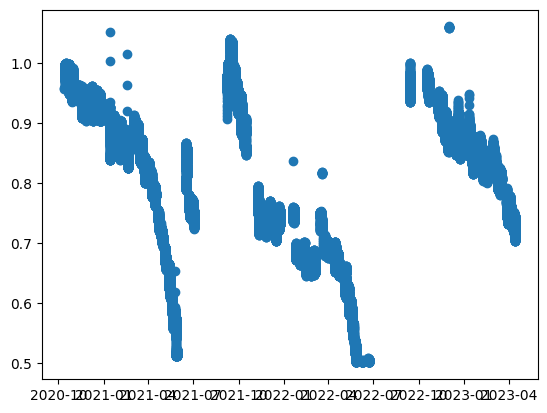

In [447]:
plt.scatter(fe.df.index, fe.df["ff"])

In [448]:
fe.df["HE_TOP_mean"] = fe.df.loc[:, 
                                 ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]
                                ].mean(axis=1)

In [449]:
fe.df["CTF_sum"] = fe.df.loc[:, 
                                 ["CTF1", "CTF2", "CTF3"]
                                ].sum(axis=1)

In [450]:
fe.df["HE_TOP_mean"]

Timestamp
2020-10-13 00:15:00    1166.236092
2020-10-13 00:20:00    1166.472184
2020-10-13 12:30:00    1166.708276
2020-10-13 12:35:00    1166.944367
2020-10-13 12:40:00    1167.180459
                          ...     
2023-04-14 09:35:00    4970.697334
2023-04-14 09:40:00    4970.948000
2023-04-14 09:45:00    4971.198667
2023-04-14 09:50:00    4971.449333
2023-04-14 09:55:00    4971.700000
Name: HE_TOP_mean, Length: 70215, dtype: float64

In [451]:
# final cleaning incase some rows consist of nan
fe.df = fe.df.dropna(axis=0)

In [452]:
fe.df.to_excel("rdy_for_stats_121020_210423.xlsx")

# Lets observe what are the relationships between
## 1 - Q and dt
## 2 - CTF operation freq and dt or Q
# And make some statistics tests on data

# For normal distrubuted data mu = expectation
# But for unknown distribution mu is defferent from expectaion

In [453]:
from scipy.stats import norm, kstest, shapiro, iqr
from scipy.optimize import curve_fit
import seaborn as sns

from statistics import Statistics

In [454]:
df_oper_cleaned = fe.df.copy()

# pumps2 = df_oper_cleaned["pumps2"].copy()
# df_oper_cleaned = df_oper_cleaned.drop(["pumps2"], axis=1)
df_oper_cleaned["pumps2"] = df_oper_cleaned["pumps2"].astype(int)


In [455]:
stats = Statistics(df_oper_cleaned)
df_oper_cleaned.columns

Index(['CTF1', 'CTF2', 'CTF3', 'P2', 'Q2', 'T1aHE', 'T1bHE', 'T2aHE', 'T2aHE1',
       'T2aHE2', 'T2aHE3', 'T2aHE4', 'T2aHE5', 'T2bHE', 'Tair', 'Treactor',
       'p21', 'p22', 'p23', 'p24', 'dt1', 'dt2', 'pumps2', 'dt_circuits_coef',
       'dt_circuits_coef_delta', 'I2mean', 'QbyIP', 'HE1_TOP', 'HE2_TOP',
       'HE3_TOP', 'HE4_TOP', 'HE5_TOP', 'HE1_status', 'HE2_status',
       'HE3_status', 'HE4_status', 'HE5_status', 'QbyIP_HEs_num',
       'QbyIP_HEs_pumps_num', 'Ndis_def', 'Ndis_by_delta',
       'Ndis_by_del_HEs_num', 'dt2_by_HEs', 'ff', 'HE_TOP_mean', 'CTF_sum'],
      dtype='object')

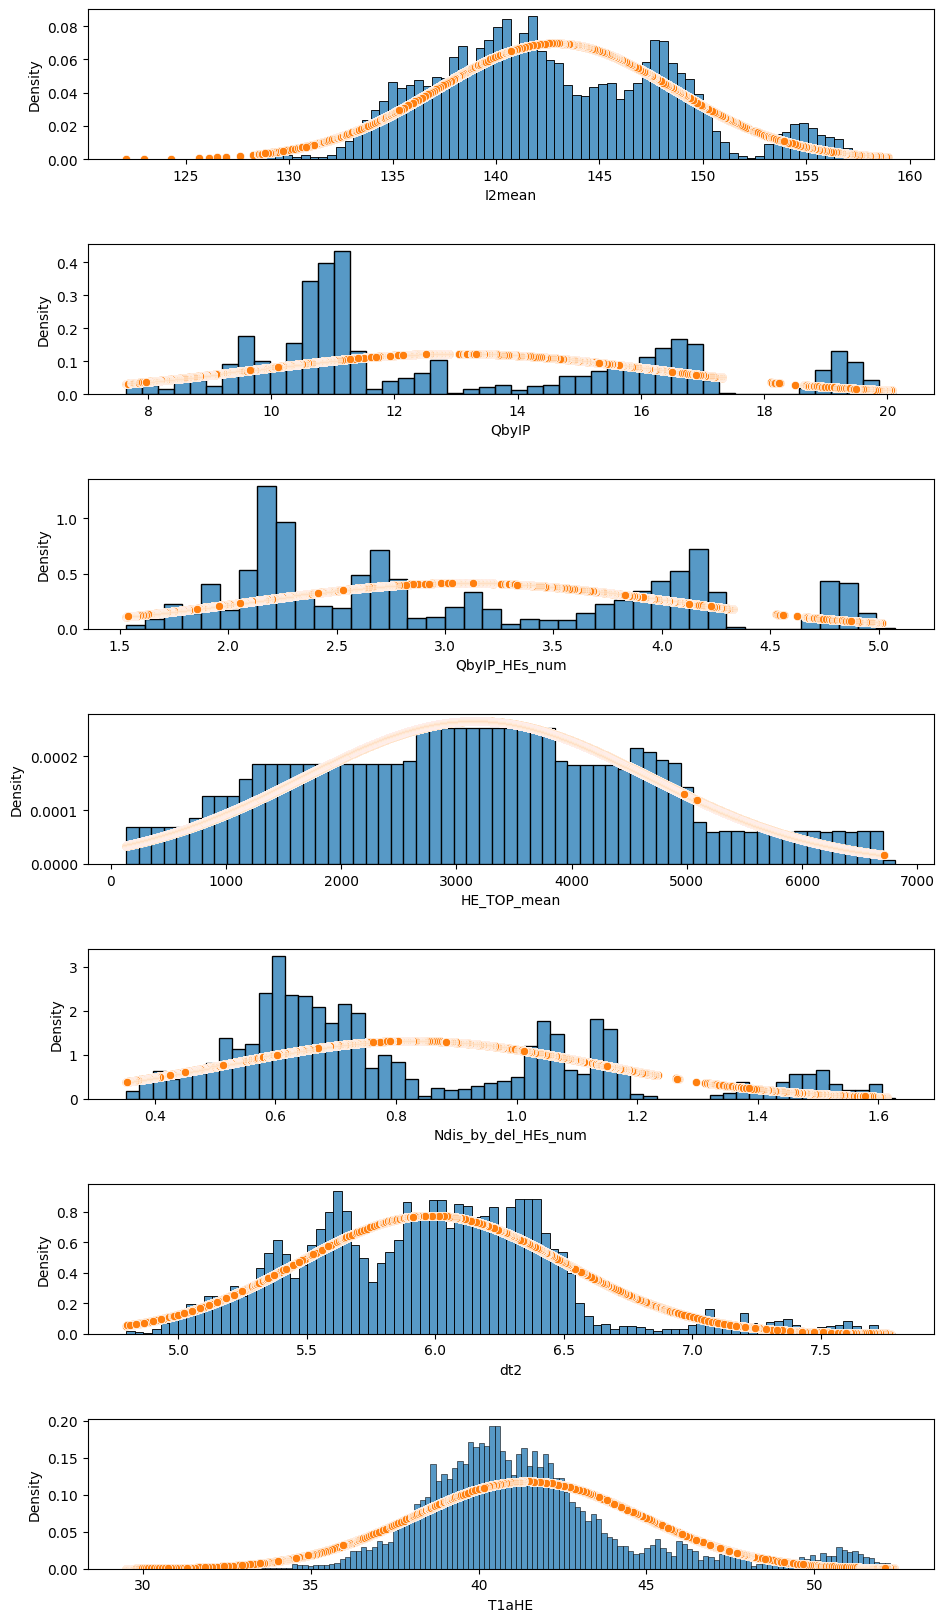

In [456]:
# number of binnes can be founded by Freedman–Diaconis rule
observations = ["I2mean", "QbyIP", "QbyIP_HEs_num", "HE_TOP_mean", "Ndis_by_del_HEs_num", "dt2", "T1aHE"]
fig, axs = plt.subplots(len(observations),1, figsize=(10,17))
fig.tight_layout(pad=4)
for n,i in enumerate(observations):

    bw = stats.FD_rule(i)
    var = i

    sns.histplot(df_oper_cleaned[var], binwidth=bw, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(df_oper_cleaned[var])
    nrm = norm(mu, sigma).pdf(df_oper_cleaned[var])
    
    sns.scatterplot(x=df_oper_cleaned[var], y=nrm, ax=axs[n])

In [457]:
# split Q on different seasons (by seasons means the time when new HEs was introduced)
# also pumps under operation could be the reason of changes

#periods of HEs operation
he1 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he2 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he3 = [("2020-10-12", "2021-06-01"), ("2022-03-14", "2023-04-14")]
he4 = [("2019-10-14", "2021-06-01"), ("2021-06-21", "2022-03-14" ), ("2022-09-05", "2023-04-14")]
he5 = [("2020-06-08", "2021-07-02"), ("2021-09-06", "2022-07-01")]




In [458]:

s1 = df_oper_cleaned.loc["2020-10-12":"2021-06-01", :]
s2 = df_oper_cleaned.loc["2021-06-21":"2021-07-02", :]
s3 = df_oper_cleaned.loc["2021-09":"2021-10", :]
s4 = df_oper_cleaned.loc["2021-11":"2022-03-10", :]
s5 = df_oper_cleaned.loc["2022-03-10":"2022-07", :]
s6 = df_oper_cleaned.loc["2023-01":"2023-04", :]

In [459]:
ss = [s1, s2, s3, s4, s5, s6]

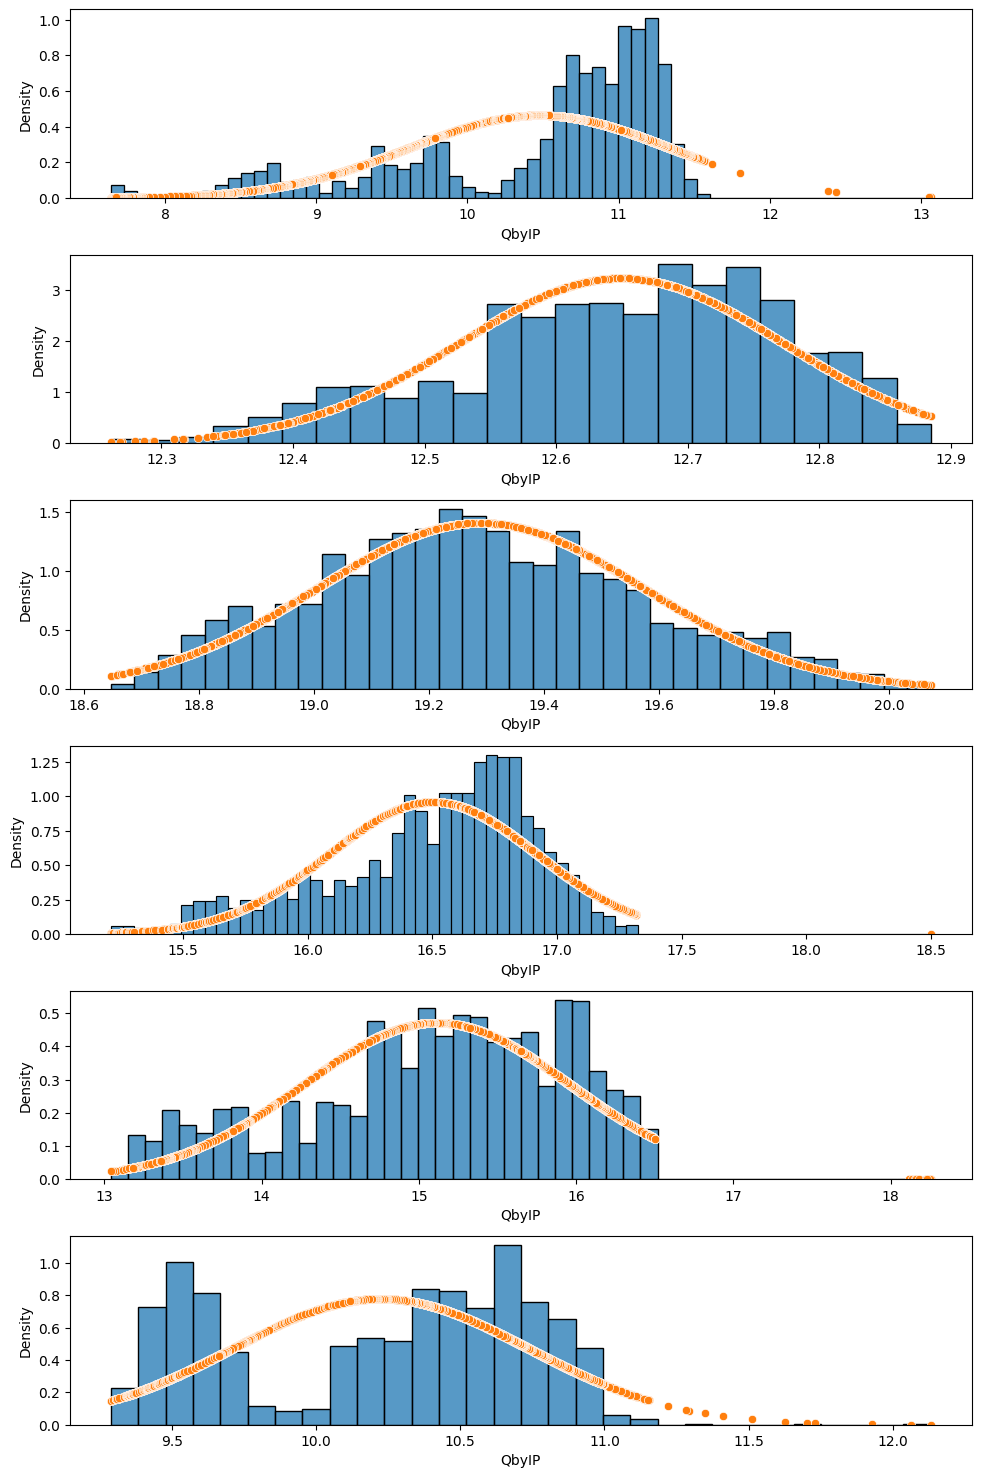

In [460]:
fig, axs = plt.subplots(len(ss),1, figsize=(10,15))
fig.tight_layout(pad=2)
for n,i in enumerate(ss):
    var = "QbyIP"
    
    b = np.histogram_bin_edges(i[var], bins="fd")
    
    sns.histplot(i[var], bins=b, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(i[var])
    nrm = norm(mu, sigma).pdf(i[var])
    
    sns.scatterplot(x=i[var], y=nrm, ax=axs[n])

In [461]:
# find what pumps were under operation and separate it from others
print("s1: ", s1["pumps2"].value_counts())
print("s2: ", s2["pumps2"].value_counts())
print("s3: ", s3["pumps2"].value_counts())
print("s4: ", s4["pumps2"].value_counts())
print("s5: ", s5["pumps2"].value_counts())
print("s6: ", s6["pumps2"].value_counts())

s1:  234     17405
134      4906
1234     1172
Name: pumps2, dtype: int64
s2:  134    2149
Name: pumps2, dtype: int64
s3:  234    6808
Name: pumps2, dtype: int64
s4:  234    11180
Name: pumps2, dtype: int64
s5:  234    8923
Name: pumps2, dtype: int64
s6:  234    6511
123    3006
Name: pumps2, dtype: int64


In [462]:
s11 = s1[s1["pumps2"] == 234]
s12 = s1[s1["pumps2"] == 134]
s13 = s1[s1["pumps2"] == 1234]

s61 = s6[s6["pumps2"] == 234]
s62 = s6[s6["pumps2"] == 123]

In [463]:
ss = [s11, s12, s13, s2, s3, s4, s5, s61, s62]

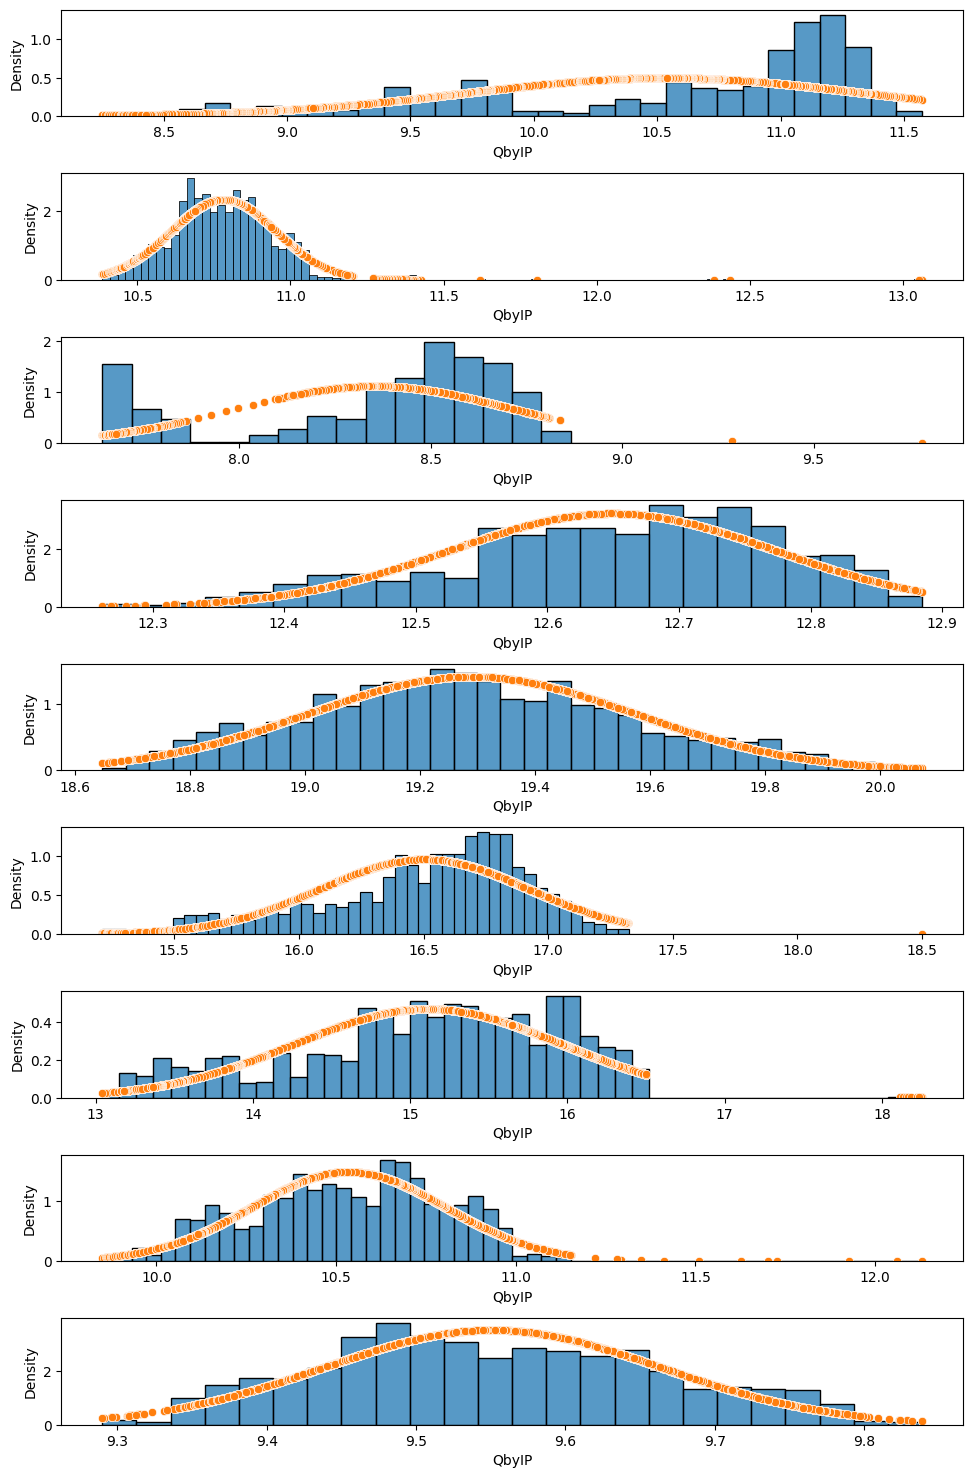

In [464]:
fig, axs = plt.subplots(len(ss),1, figsize=(10,15))
fig.tight_layout(pad=2)
for n,i in enumerate(ss):
    var = "QbyIP"
    
    b = np.histogram_bin_edges(i[var], bins="fd")
    
    sns.histplot(i[var], bins=b, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(i[var])
    nrm = norm(mu, sigma).pdf(i[var])
    
    sns.scatterplot(x=i[var], y=nrm, ax=axs[n])

In [465]:
# filter of outliers
l, u = -1.96, 1.96
ss_ftrd = []

for i in ss:
#     i = i[]
    stdzd = scipy.stats.zscore(i["QbyIP"])
    norm_ind = stdzd[(stdzd > l) & (stdzd < u)].index
    
    ss_ftrd.append(i.loc[norm_ind, :])
    
# ss_ftrd = np.array(ss_ftrd)

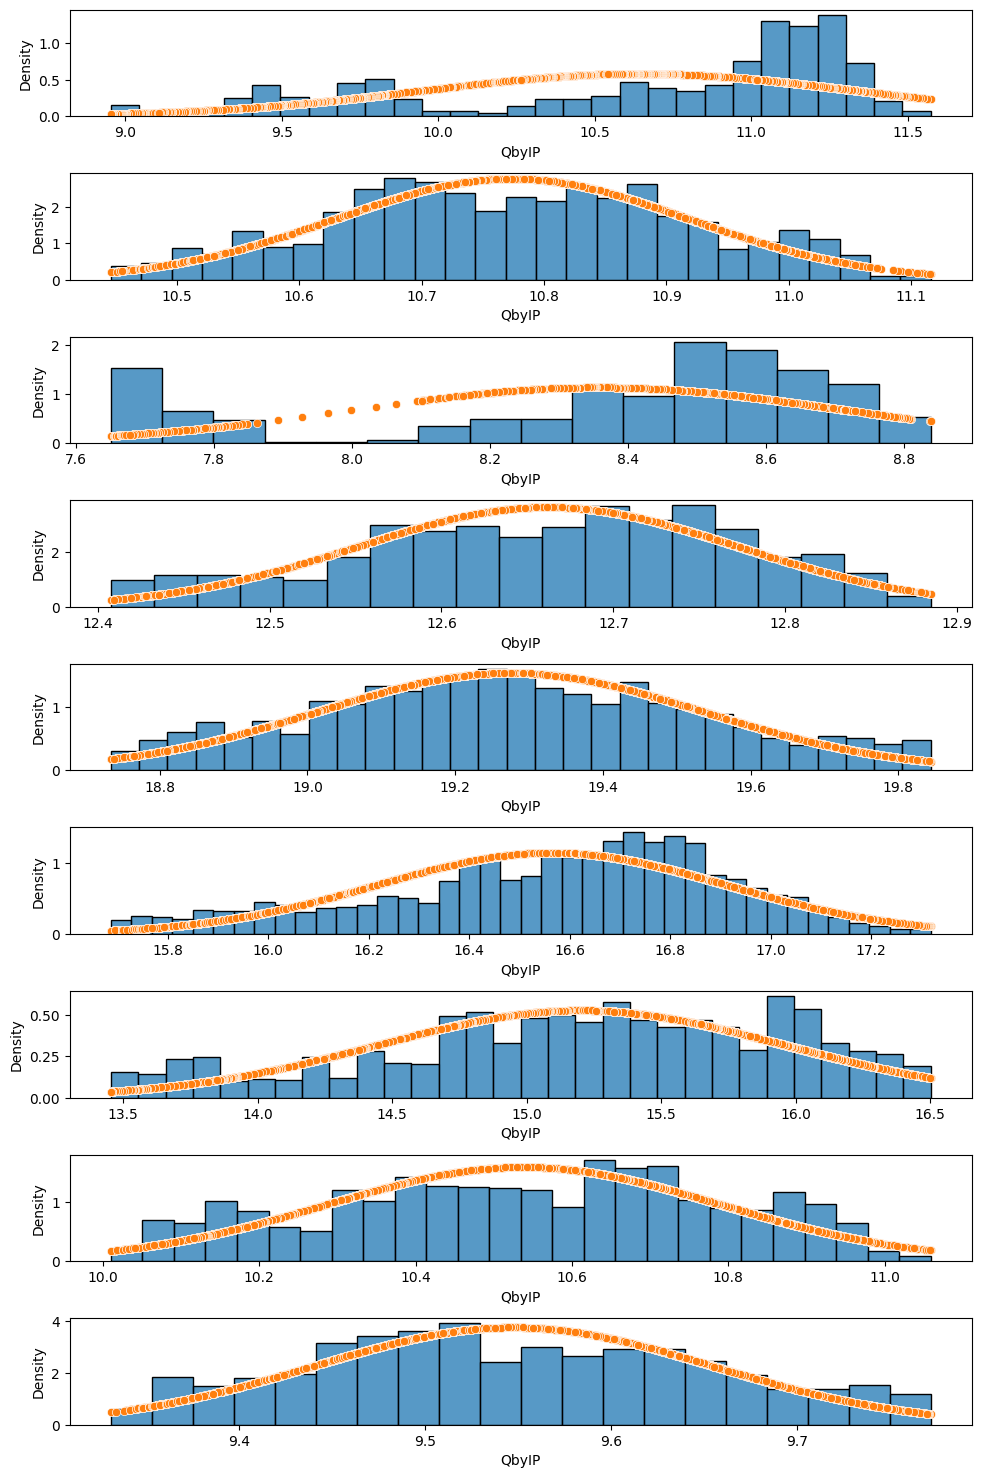

In [466]:
fig, axs = plt.subplots(len(ss_ftrd),1, figsize=(10,15))
fig.tight_layout(pad=2)
for n,i in enumerate(ss_ftrd):
    var = "QbyIP"
    
    b = np.histogram_bin_edges(i[var], bins="fd")
    
    sns.histplot(i[var], bins=b, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(i[var])
    nrm = norm(mu, sigma).pdf(i[var])
    
    sns.scatterplot(x=i[var], y=nrm, ax=axs[n])

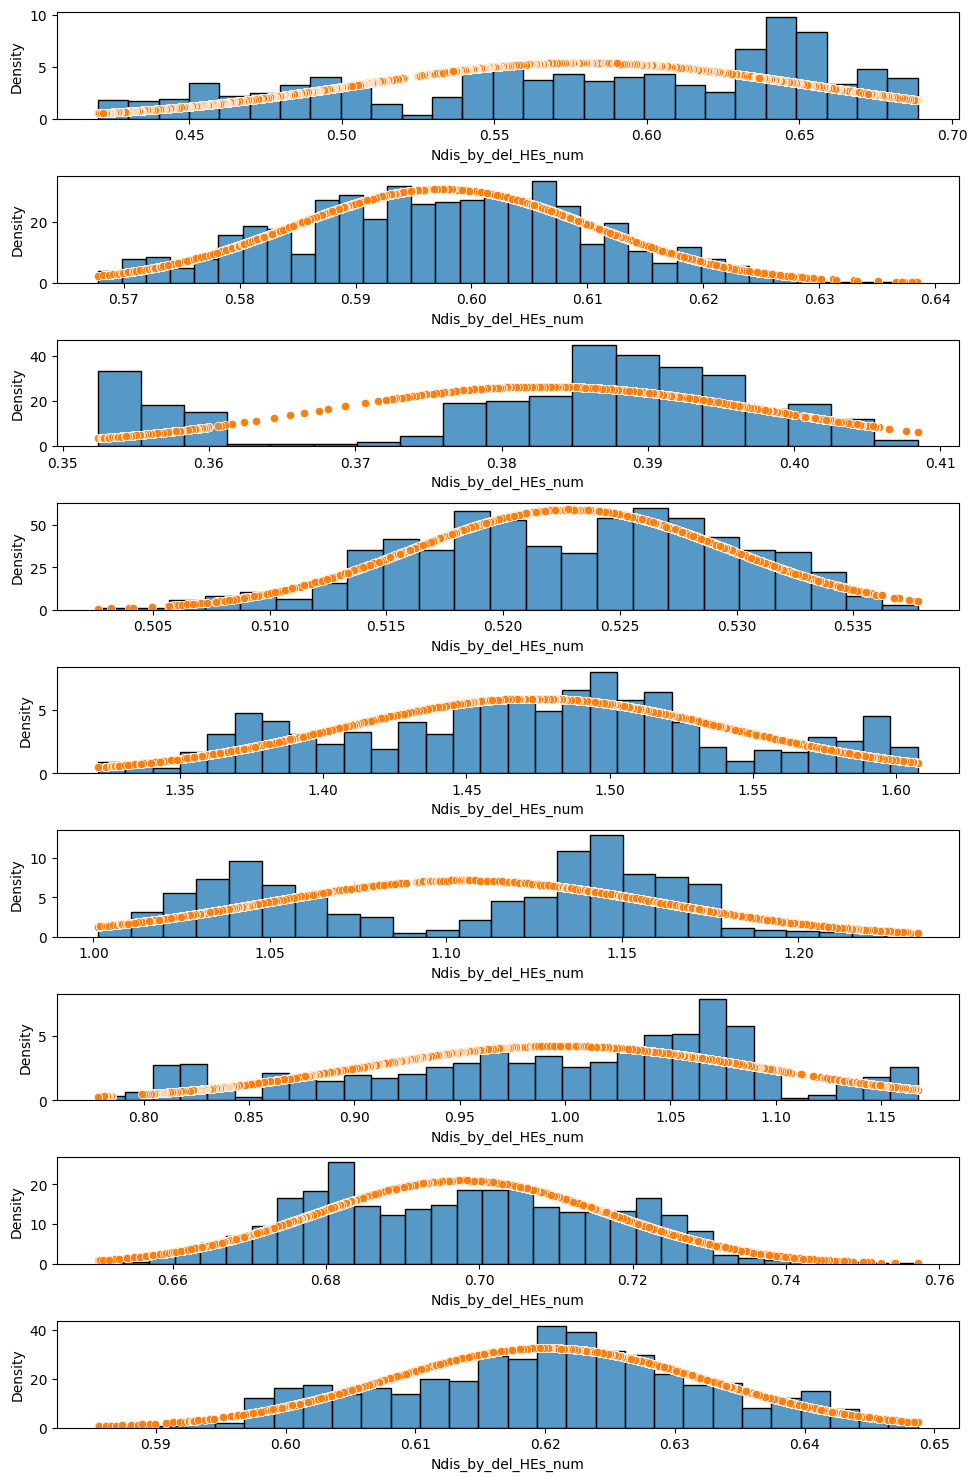

In [467]:
fig, axs = plt.subplots(len(ss_ftrd),1, figsize=(10,15))
fig.tight_layout(pad=2)
for n,i in enumerate(ss_ftrd):
    var = "Ndis_by_del_HEs_num"
    
    b = np.histogram_bin_edges(i[var], bins="fd")
    
    sns.histplot(i[var], bins=b, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(i[var])
    nrm = norm(mu, sigma).pdf(i[var])
    
    sns.scatterplot(x=i[var], y=nrm, ax=axs[n])

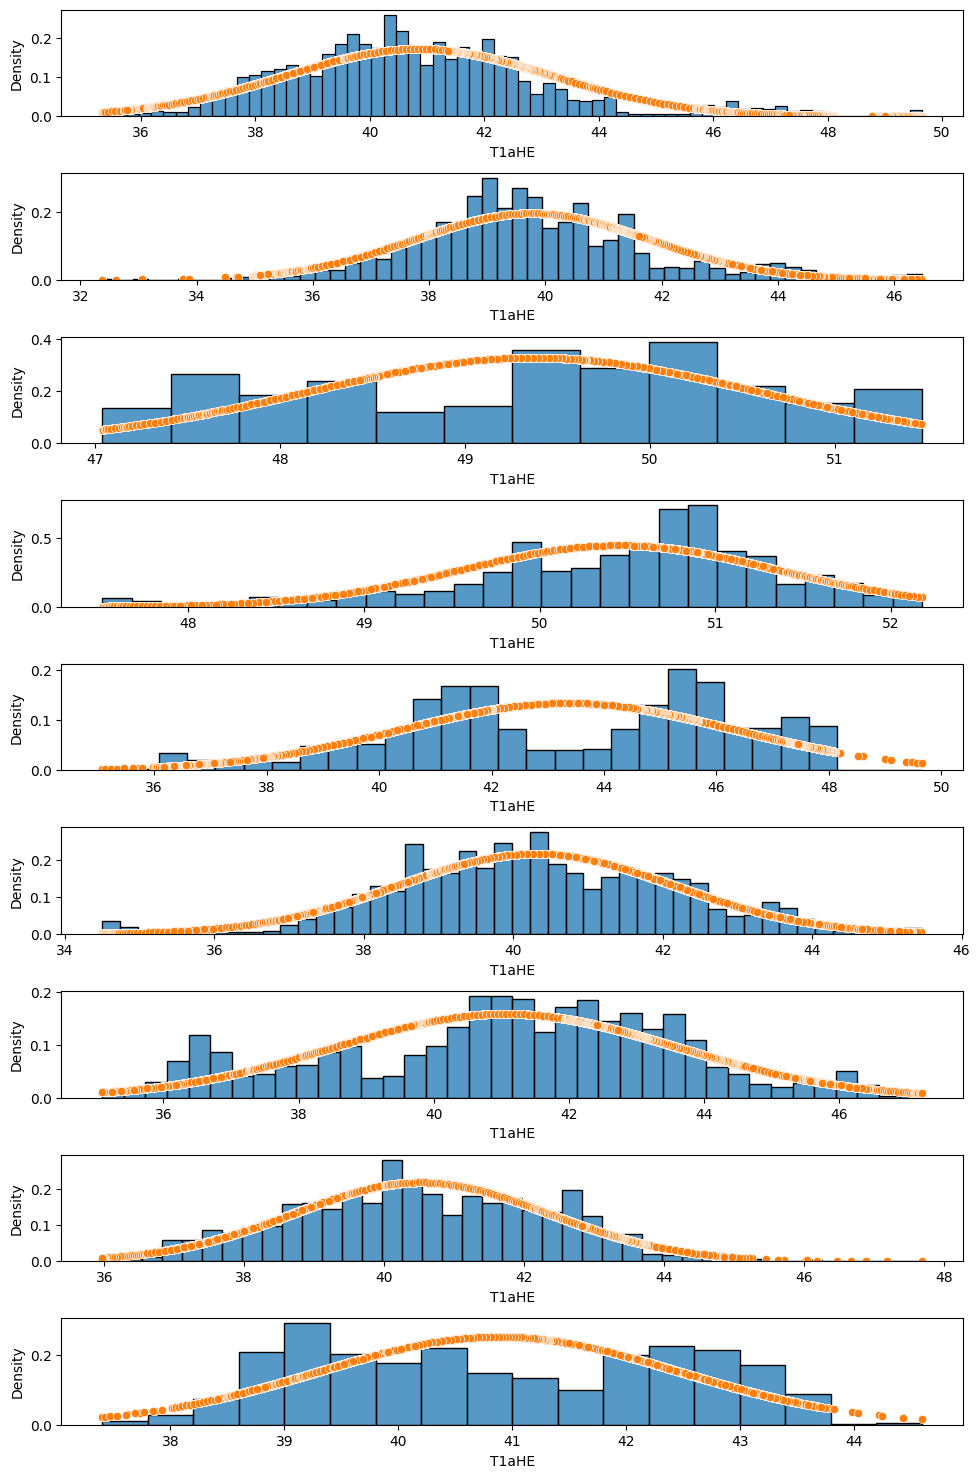

In [468]:
fig, axs = plt.subplots(len(ss_ftrd),1, figsize=(10,15))
fig.tight_layout(pad=2)
for n,i in enumerate(ss_ftrd):
    var = "T1aHE"
    
    b = np.histogram_bin_edges(i[var], bins="fd")
    
    sns.histplot(i[var], bins=b, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(i[var])
    nrm = norm(mu, sigma).pdf(i[var])
    
    sns.scatterplot(x=i[var], y=nrm, ax=axs[n])

In [469]:
# lets omit HEs periods and take a look only on pumps
p123 = df_oper_cleaned[df_oper_cleaned["pumps2"] == 123]
p234 = df_oper_cleaned[df_oper_cleaned["pumps2"] == 234]
p134 = df_oper_cleaned[df_oper_cleaned["pumps2"] == 134]
p1234 = df_oper_cleaned[df_oper_cleaned["pumps2"] == 1234]

ps = [p123, p234, p134, p1234]

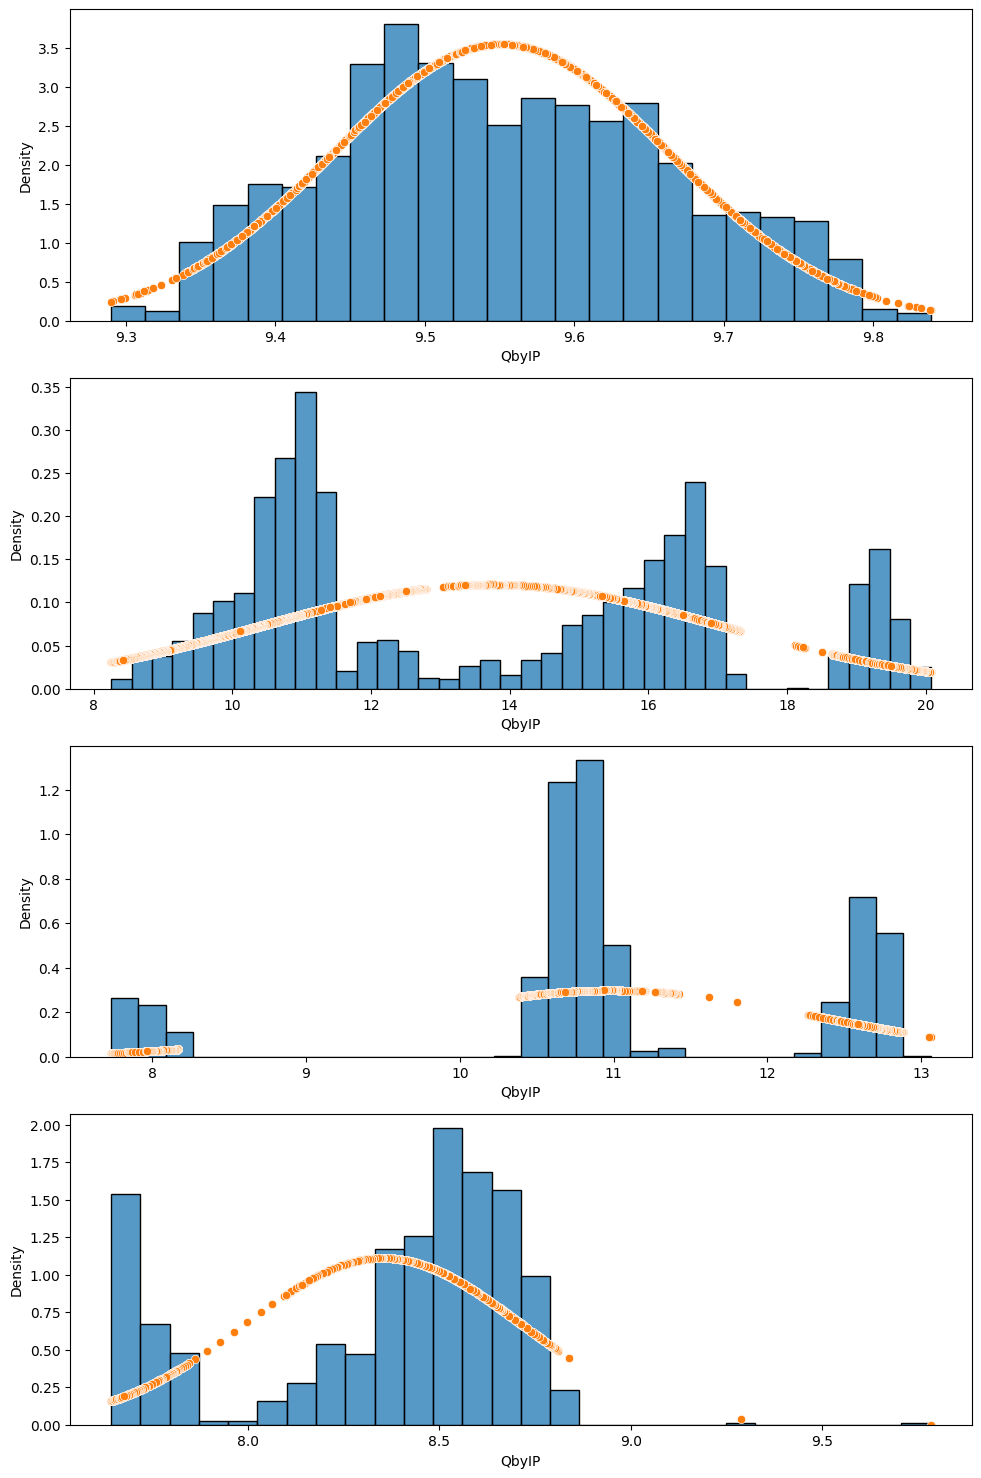

In [470]:
# lets omit HEs periods and take a look only on pumps
fig, axs = plt.subplots(len(ps),1, figsize=(10,15))
fig.tight_layout(pad=2)
for n,i in enumerate(ps):
    var = "QbyIP"
    
    b = np.histogram_bin_edges(i[var], bins="fd")
    
    sns.histplot(i[var], bins=b, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(i[var])
    nrm = norm(mu, sigma).pdf(i[var])
    
    sns.scatterplot(x=i[var], y=nrm, ax=axs[n])

In [471]:
# QbyIP standartization

qbyip_stdrtzd = scipy.stats.zscore(df_oper_cleaned["QbyIP"])
qbyip_stdrtzd

Timestamp
2020-10-13 00:15:00   -0.581358
2020-10-13 00:20:00   -0.578140
2020-10-13 12:30:00   -0.574156
2020-10-13 12:35:00   -0.571972
2020-10-13 12:40:00   -0.568978
                         ...   
2023-04-14 09:35:00   -1.023602
2023-04-14 09:40:00   -1.023994
2023-04-14 09:45:00   -1.024825
2023-04-14 09:50:00   -1.025235
2023-04-14 09:55:00   -1.025868
Name: QbyIP, Length: 70215, dtype: float64

In [472]:
# transofrm HEs_TOP_mean to data of range (0.5,1)
from sklearn import preprocessing
hes_top_mm = preprocessing.MinMaxScaler(feature_range=(0.4,1)).fit_transform(
    df_oper_cleaned["HE_TOP_mean"].to_numpy().reshape(-1,1)
).reshape(-1)


In [473]:
qbyip_stdrtzd_norm = qbyip_stdrtzd/hes_top_mm

In [474]:
qbyip_stdrtzd_norm

Timestamp
2020-10-13 00:15:00   -1.175948
2020-10-13 00:20:00   -1.169388
2020-10-13 12:30:00   -1.161278
2020-10-13 12:35:00   -1.156811
2020-10-13 12:40:00   -1.150706
                         ...   
2023-04-14 09:35:00   -1.216739
2023-04-14 09:40:00   -1.217171
2023-04-14 09:45:00   -1.218126
2023-04-14 09:50:00   -1.218581
2023-04-14 09:55:00   -1.219300
Name: QbyIP, Length: 70215, dtype: float64

<AxesSubplot: xlabel='Timestamp', ylabel='QbyIP'>

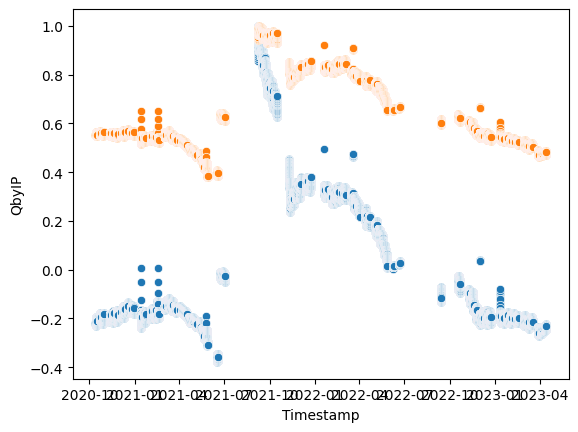

In [475]:
sns.scatterplot(qbyip_stdrtzd_norm/qbyip_stdrtzd_norm.max())
sns.scatterplot(df_oper_cleaned["QbyIP"]/df_oper_cleaned["QbyIP"].max())

(array([18536., 18628., 18718., 18809., 18901., 18993., 19083., 19174.,
        19266., 19358., 19448.]),
 [Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04')])

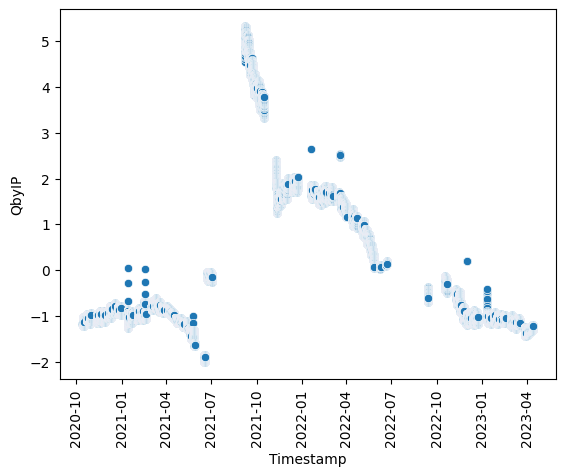

In [476]:
sns.scatterplot(qbyip_stdrtzd_norm)
plt.xticks(rotation=90)

<AxesSubplot: xlabel='QbyIP', ylabel='Count'>

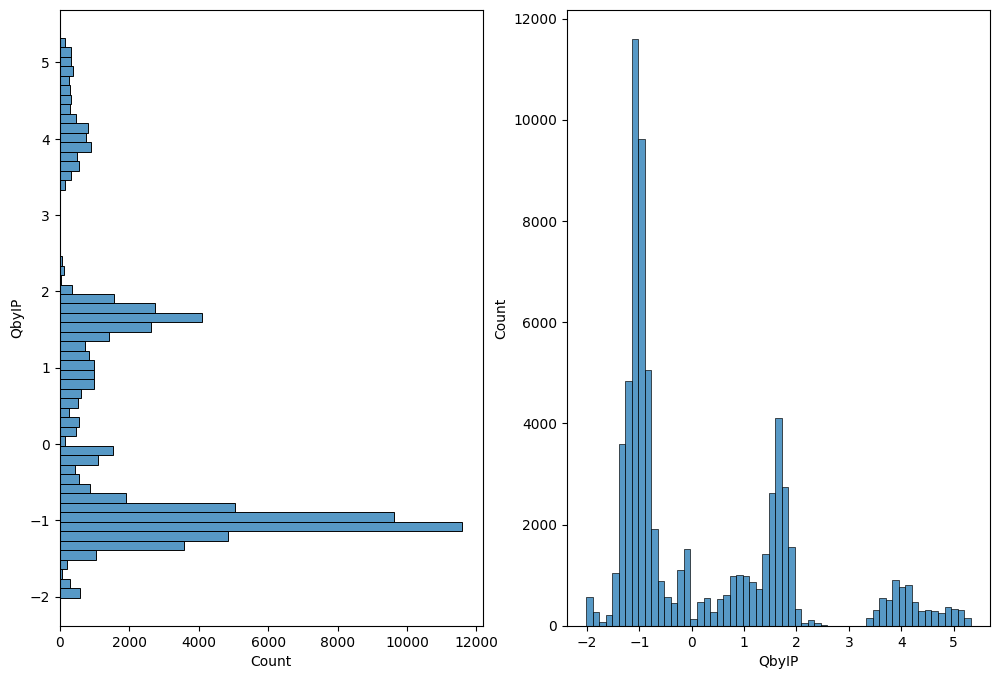

In [477]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
sns.histplot(qbyip_stdrtzd_norm, y=qbyip_stdrtzd_norm, ax=axs[0])
sns.histplot(qbyip_stdrtzd_norm, ax=axs[1])

In [478]:
# there are 3 different distributions over here
qbyip_stdrtzd_norm1 = qbyip_stdrtzd_norm[(qbyip_stdrtzd_norm > qbyip_stdrtzd_norm.min()) & (qbyip_stdrtzd_norm < 0)]
qbyip_stdrtzd_norm2 = qbyip_stdrtzd_norm[(qbyip_stdrtzd_norm > 0) & (qbyip_stdrtzd_norm < 3)]
qbyip_stdrtzd_norm3 = qbyip_stdrtzd_norm[(qbyip_stdrtzd_norm > 3) & (qbyip_stdrtzd_norm < qbyip_stdrtzd_norm.max())]

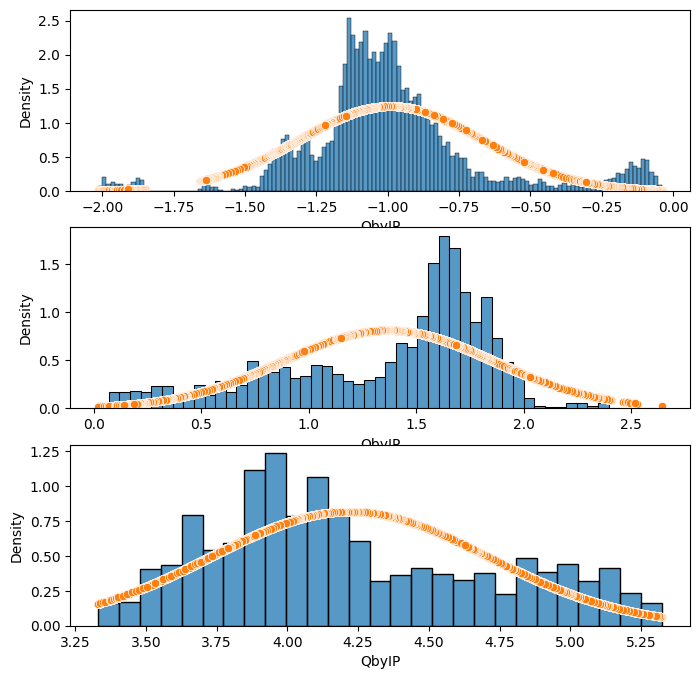

In [479]:
fig, axs = plt.subplots(3,1, figsize=(8,8))
for n, i in enumerate([qbyip_stdrtzd_norm1, qbyip_stdrtzd_norm2, qbyip_stdrtzd_norm3]):
    sns.histplot(i, ax=axs[n], stat="density")
    
    mu, sigma = norm.fit(i)
    nrm = norm(mu, sigma).pdf(i)
    
    sns.scatterplot(x=i, y=nrm, ax=axs[n])

In [480]:
qbyip1 = df_oper_cleaned.loc[qbyip_stdrtzd_norm1.index, ["QbyIP"]]
qbyip2 = df_oper_cleaned.loc[qbyip_stdrtzd_norm2.index, ["QbyIP"]]
qbyip3 = df_oper_cleaned.loc[qbyip_stdrtzd_norm3.index, ["QbyIP"]]


NormaltestResult(statistic=array([1462.16540087]), pvalue=array([0.]))
NormaltestResult(statistic=array([2203.45797958]), pvalue=array([0.]))
NormaltestResult(statistic=array([150.39479977]), pvalue=array([2.19879214e-33]))


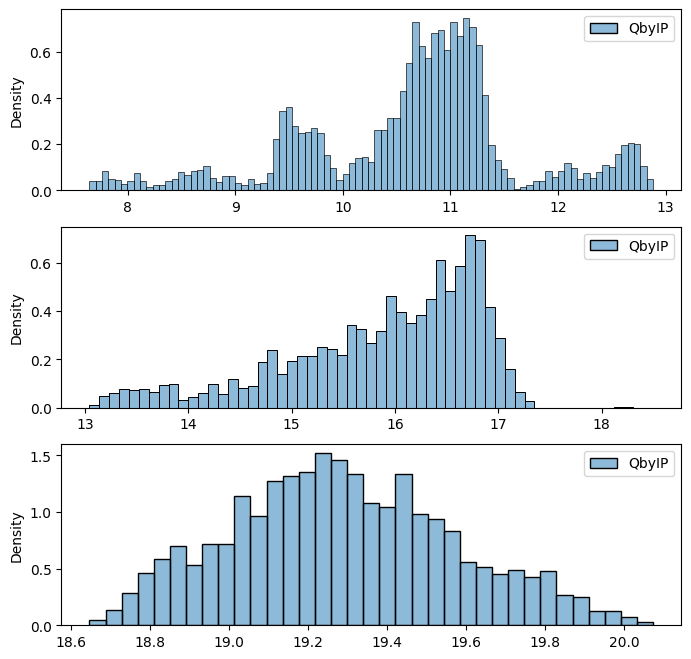

In [481]:
fig, axs = plt.subplots(3,1, figsize=(8,8))
for n, i in enumerate([qbyip1, qbyip2, qbyip3]):
    sns.histplot(i, ax=axs[n], stat="density")
    print(scipy.stats.normaltest(i))

<AxesSubplot: >

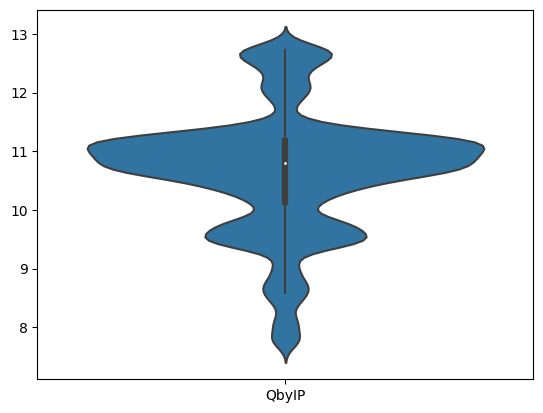

In [482]:
sns.violinplot(qbyip1)